In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
myfolder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/neuroseq_notebooks/"

In [3]:
file_df = pd.read_csv(myfolder+'/file_tracking.tsv', sep='\t', index_col=0)

file_df

type time_point  \
label                                                         
all_sample_h5                     scanpy h5 file        all   
D11_h5                            scanpy h5 file        D11   
D30_h5                            scanpy h5 file        D30   
D52_h5                            scanpy h5 file        D52   
D11_cell_fractions                           tsv        D11   
D30_cell_fractions                           tsv        D30   
D52_cell_fractions                           tsv        D52   
diff_efficiency                              tsv        D52   
diff_trajectories                            tsv        all   
ipsc_bulk_rna_seq                            tsv        NaN   
ipsc_bulk_rna_seq_hq_sample_list             tsv        NaN   
pool_metadata                                tsv        NaN   
sample_metadata                              tsv        NaN   

                                                                        description  \
label                                                                                 
all_sample_h5                     Scanpy file with subsample of cells from all t...   
D11_h5                                               scanpy file with all D11 cells   
D30_h5                                               scanpy file with all D30 cells   
D52_h5                                               scanpy file with all D52 cells   
D11_cell_fractions                table of cell fractions for (donor_id,pool_id)...   
D30_cell_fractions                table of cell fractions for (donor_id,pool_id)...   
D52_cell_fractions                table of cell fractions for (donor_id,pool_id)...   
diff_efficiency                       differentiation efficiency for each cell line   
diff_trajectories                 all differentiation trajectories, restricted t...   
ipsc_bulk_rna_seq                        bulk RNA-seq for iPSCs, from i2QTL project   
ipsc_bulk_rna_seq_hq_sample_list  list of bulk RNA-seq iPSC samples which are hi...   
pool_metadata                                                    metadata for pools   
sample_metadata                                                metadata for samples   

                                                                               path  
label                                                                                
all_sample_h5                     /nfs/leia/research/stegle/dseaton/hipsci/singl...  
D11_h5                            /nfs/leia/research/stegle/dseaton/hipsci/singl...  
D30_h5                            /nfs/leia/research/stegle/dseaton/hipsci/singl...  
D52_h5                            /nfs/leia/research/stegle/dseaton/hipsci/singl...  
D11_cell_fractions                /nfs/leia/research/stegle/dseaton/hipsci/singl...  
D30_cell_fractions                /nfs/leia/research/stegle/dseaton/hipsci/singl...  
D52_cell_fractions                /nfs/leia/research/stegle/dseaton/hipsci/singl...  
diff_efficiency                   /nfs/leia/research/stegle/dseaton/hipsci/singl...  
diff_trajectories                 /nfs/leia/research/stegle/dseaton/hipsci/singl...  
ipsc_bulk_rna_seq                 /hps/nobackup/hipsci/scratch/trans_eqtls/IPS_B...  
ipsc_bulk_rna_seq_hq_sample_list  /nfs/leia/research/stegle/dseaton/hipsci/singl...  
pool_metadata                     /nfs/leia/research/stegle/dseaton/hipsci/singl...  
sample_metadata                   /nfs/leia/research/stegle/dseaton/hipsci/singl...

In [4]:
file = file_df.loc['all_sample_h5','path']

adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [7]:
adatafull.obs

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                     
TTCCCAGGTTCCATGA-1-0       0  HPSI0214i-eiwy_1                 7.893572   
AACCGCGAGGTCATCT-1-0       0  HPSI0114i-eipl_1                 8.214194   
TCACAAGTCTTATCTG-1-0       0  HPSI1113i-podx_1                 8.319474   
TACCTTACACGGTTTA-1-0       0  HPSI0614i-liqa_1                 7.825245   
CCTAGCTAGCGCCTTG-1-0       0  HPSI0114i-eipl_1                 8.029433   
...                      ...               ...                      ...   
GGGCATCTCAACGCTA-1-150   150  HPSI1113i-qorq_1                 8.315322   
GGCCGATGTGTCCTCT-1-150   150  HPSI0115i-jotn_2                 8.343554   
GCGCAGTTCACGAAGG-1-150   150  HPSI0114i-vass_1                 8.341649   
GCGCAGTAGGAATGGA-1-150   150  HPSI1113i-qorq_1                 8.279190   
GTCCTCATCTAACTTC-1-150   150  HPSI0114i-rozh_4                 7.697575   

                        log1p_total_counts  log1p_total_counts_mito  \
index                                                                 
TTCCCAGGTTCCATGA-1-0              9.321613                 4.077538   
AACCGCGAGGTCATCT-1-0              9.801510                 5.147494   
TCACAAGTCTTATCTG-1-0             10.024244                 5.318120   
TACCTTACACGGTTTA-1-0              9.297252                 4.744932   
CCTAGCTAGCGCCTTG-1-0              9.451638                 4.718499   
...                                    ...                      ...   
GGGCATCTCAACGCTA-1-150            9.783182                 6.086775   
GGCCGATGTGTCCTCT-1-150            9.910066                 6.824374   
GCGCAGTTCACGAAGG-1-150           10.012028                 6.922644   
GCGCAGTAGGAATGGA-1-150            9.780755                 7.613819   
GTCCTCATCTAACTTC-1-150            8.703838                 4.174387   

                        n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                    
TTCCCAGGTTCCATGA-1-0                 2679                    53.543307   
AACCGCGAGGTCATCT-1-0                 3692                    51.971207   
TCACAAGTCTTATCTG-1-0                 4102                    51.511123   
TACCTTACACGGTTTA-1-0                 2502                    58.595397   
CCTAGCTAGCGCCTTG-1-0                 3069                    50.487115   
...                                   ...                          ...   
GGGCATCTCAACGCTA-1-150               4085                    37.074216   
GGCCGATGTGTCCTCT-1-150               4202                    42.933784   
GCGCAGTTCACGAAGG-1-150               4194                    40.848735   
GCGCAGTAGGAATGGA-1-150               3940                    45.830742   
GTCCTCATCTAACTTC-1-150               2202                    40.680498   

                        pct_counts_in_top_200_genes  \
index                                                 
TTCCCAGGTTCCATGA-1-0                      63.842162   
AACCGCGAGGTCATCT-1-0                      61.666667   
TCACAAGTCTTATCTG-1-0                      61.176106   
TACCTTACACGGTTTA-1-0                      67.717979   
CCTAGCTAGCGCCTTG-1-0                      60.402263   
...                                             ...   
GGGCATCTCAACGCTA-1-150                    48.325062   
GGCCGATGTGTCCTCT-1-150                    53.519448   
GCGCAGTTCACGAAGG-1-150                    51.157366   
GCGCAGTAGGAATGGA-1-150                    54.564984   
GTCCTCATCTAACTTC-1-150                    51.435685   

                        pct_counts_in_top_500_genes  \
index                                                 
TTCCCAGGTTCCATGA-1-0                      74.865784   
AACCGCGAGGTCATCT-1-0                      72.530454   
TCACAAGTCTTATCTG-1-0                      71.900204   
TACCTTACACGGTTTA-1-0                      77.775740   
CCTAGCTAGCGCCTTG-1-0                      71.763042   
...                                             ...   
GGGC

In [8]:
adatafull.obs['celltype_timepoint'] = (adatafull.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

In [9]:
old_to_new = dict(
    DA_D52 = 'DA_D52',
    Astro_D30 = 'FPP_D30',
    DA_D30 = 'DA_D30',
    P_FPP_D11 = 'P_FPP_D11', 
    FPP_D52 = 'FPP_D52',
    Sert_D52 = 'Sert_D52',
    FPP_D11 = 'FPP_D11', 
    NB_D11 = 'NB_D11', 
    CHem_D30 = 'U_Neur1_D30', 
    P_FPP_D30 = 'P_FPP_D30',
    Epen1_D52 = 'Epen1_D52', 
    Astro_D52 = 'Astro_D52', 
    CHem_D52 = 'U_Neur1_D52', 
    Epen1_D30 = 'Epen1_D30', 
    P_FPP_D52 = 'P_FPP_D52',
    unknown_D30 = 'U_Neur2_D30', 
    Sert_D30 = 'Sert_D30', 
    Epen2_D52 = 'Epen2_D52', 
    unknown_D52 = 'U_Neur3_D52',
    P_Sert_D52 = 'P_Sert_D52'
)
adatafull.obs['celltype_timepoint_new'] = (
    adatafull.obs['celltype_timepoint']
    .map(old_to_new)
    .astype('category')
)

In [10]:
adatafull.obs['celltype_timepoint_new']

index
TTCCCAGGTTCCATGA-1-0        FPP_D11
AACCGCGAGGTCATCT-1-0      P_FPP_D11
TCACAAGTCTTATCTG-1-0      P_FPP_D11
TACCTTACACGGTTTA-1-0        FPP_D11
CCTAGCTAGCGCCTTG-1-0      P_FPP_D11
                            ...    
GGGCATCTCAACGCTA-1-150     Sert_D52
GGCCGATGTGTCCTCT-1-150     Sert_D52
GCGCAGTTCACGAAGG-1-150     Sert_D52
GCGCAGTAGGAATGGA-1-150     Sert_D52
GTCCTCATCTAACTTC-1-150       DA_D52
Name: celltype_timepoint_new, Length: 205416, dtype: category
Categories (20, object): [Astro_D52, DA_D30, DA_D52, Epen1_D30, ..., U_Neur1_D30, U_Neur1_D52, U_Neur2_D30, U_Neur3_D52]

In [11]:
old_to_new = dict(
    DA_D52 = 'DA',
    FPP_D30 = 'FPP',
    DA_D30 = 'DA',
    P_FPP_D11 = 'P_FPP', 
    FPP_D52 = 'FPP',
    Sert_D52 = 'Sert',
    FPP_D11 = 'FPP', 
    NB_D11 = 'NB', 
    U_Neur1_D30 = 'U_Neur1', 
    P_FPP_D30 = 'P_FPP',
    Epen1_D52 = 'Epen1', 
    Astro_D52 = 'Astro', 
    U_Neur1_D52 = 'U_Neur1', 
    Epen1_D30 = 'Epen1', 
    P_FPP_D52 = 'P_FPP',
    U_Neur2_D30 = 'U_Neur2', 
    Sert_D30 = 'Sert', 
    Epen2_D52 = 'Epen2', 
    U_Neur3_D52 = 'U_Neur3',
    P_Sert_D52 = 'P_Sert'
)
adatafull.obs['celltype_new'] = (
    adatafull.obs['celltype_timepoint_new']
    .map(old_to_new)
    .astype('category')
)

In [12]:
adatafull.obs['celltype_new']

index
TTCCCAGGTTCCATGA-1-0        FPP
AACCGCGAGGTCATCT-1-0      P_FPP
TCACAAGTCTTATCTG-1-0      P_FPP
TACCTTACACGGTTTA-1-0        FPP
CCTAGCTAGCGCCTTG-1-0      P_FPP
                          ...  
GGGCATCTCAACGCTA-1-150     Sert
GGCCGATGTGTCCTCT-1-150     Sert
GCGCAGTTCACGAAGG-1-150     Sert
GCGCAGTAGGAATGGA-1-150     Sert
GTCCTCATCTAACTTC-1-150       DA
Name: celltype_new, Length: 205416, dtype: category
Categories (12, object): [Astro, DA, Epen1, Epen2, ..., Sert, U_Neur1, U_Neur2, U_Neur3]

In [13]:
# adatafull.obs.to_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/neuroseq_metadata_all.txt",sep = "\t")

In [14]:
adatafull.n_obs

205416

In [15]:
adatafull.obs.head()

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                   
TTCCCAGGTTCCATGA-1-0     0  HPSI0214i-eiwy_1                 7.893572   
AACCGCGAGGTCATCT-1-0     0  HPSI0114i-eipl_1                 8.214194   
TCACAAGTCTTATCTG-1-0     0  HPSI1113i-podx_1                 8.319474   
TACCTTACACGGTTTA-1-0     0  HPSI0614i-liqa_1                 7.825245   
CCTAGCTAGCGCCTTG-1-0     0  HPSI0114i-eipl_1                 8.029433   

                      log1p_total_counts  log1p_total_counts_mito  \
index                                                               
TTCCCAGGTTCCATGA-1-0            9.321613                 4.077538   
AACCGCGAGGTCATCT-1-0            9.801510                 5.147494   
TCACAAGTCTTATCTG-1-0           10.024244                 5.318120   
TACCTTACACGGTTTA-1-0            9.297252                 4.744932   
CCTAGCTAGCGCCTTG-1-0            9.451638                 4.718499   

                      n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                  
TTCCCAGGTTCCATGA-1-0               2679                    53.543307   
AACCGCGAGGTCATCT-1-0               3692                    51.971207   
TCACAAGTCTTATCTG-1-0               4102                    51.511123   
TACCTTACACGGTTTA-1-0               2502                    58.595397   
CCTAGCTAGCGCCTTG-1-0               3069                    50.487115   

                      pct_counts_in_top_200_genes  \
index                                               
TTCCCAGGTTCCATGA-1-0                    63.842162   
AACCGCGAGGTCATCT-1-0                    61.666667   
TCACAAGTCTTATCTG-1-0                    61.176106   
TACCTTACACGGTTTA-1-0                    67.717979   
CCTAGCTAGCGCCTTG-1-0                    60.402263   

                      pct_counts_in_top_500_genes  pct_counts_in_top_50_genes  \
index                                                                           
TTCCCAGGTTCCATGA-1-0                    74.865784                   37.687903   
AACCGCGAGGTCATCT-1-0                    72.530454                   37.308970   
TCACAAGTCTTATCTG-1-0                    71.900204                   36.860764   
TACCTTACACGGTTTA-1-0                    77.775740                   42.917393   
CCTAGCTAGCGCCTTG-1-0                    71.763042                   36.635764   

                      ...  total_counts_mito cluster_id  time_point  pool_id  \
index                 ...                                                      
TTCCCAGGTTCCATGA-1-0  ...               58.0          3         D11    pool1   
AACCGCGAGGTCATCT-1-0  ...              171.0          5         D11    pool1   
TCACAAGTCTTATCTG-1-0  ...              203.0          5         D11    pool1   
TACCTTACACGGTTTA-1-0  ...              114.0          3         D11    pool1   
CCTAGCTAGCGCCTTG-1-0  ...              111.0          5         D11    pool1   

                      treatment n_counts_all celltype celltype_timepoint  \
index                                                                      
TTCCCAGGTTCCATGA-1-0       NONE      11176.0      FPP            FPP_D11   
AACCGCGAGGTCATCT-1-0       NONE      18060.0    P_FPP          P_FPP_D11   
TCACAAGTCTTATCTG-1-0       NONE      22566.0    P_FPP          P_FPP_D11   
TACCTTACACGGTTTA-1-0       NONE      10907.0      FPP            FPP_D11   
CCTAGCTAGCGCCTTG-1-0       NONE      12728.0    P_FPP          P_FPP_D11   

                      celltype_timepoint_new celltype_new  
index                                                      
TTCCCAGGTTCCATGA-1-0                 FPP_D11          FPP  
AACCGCGAGGTCATCT-1-0               P_FPP_D11        P_FPP  
TCACAAGTCTTATCTG-1-0               P_FPP_D11        P_FPP  
TACCTTACACGGTTTA-1-0                 FPP_D11          FPP  
CCTAGCTAGCGCCTTG-1-0               P_FPP_D11        P_FPP  

[5 rows x 23 columns]

In [16]:
# subsample
fraction = 1
# fraction = 0.2
adata = sc.pp.subsample(adatafull, fraction, copy=True)

# selected_pools = ['pool10','pool11','pool12']
# adata = adatafull[adatafull.obs['pool_id'].isin(selected_pools),: ]

In [17]:
adata.n_obs

205416

In [18]:
adata.obs

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                     
ATCGAGTTCAAACGGG-1-60     60  HPSI0514i-fiaj_1                 8.347827   
ACCAGTAAGACCTAGG-1-81     81  HPSI0115i-aoxv_1                 8.043984   
GCTGCAGCAACCGCCA-1-46     46  HPSI0214i-poih_2                 6.579251   
AACTCCCTCGACAGCC-1-66     66  HPSI0414i-mita_1                 7.980024   
CGTCCATGTAGGCTGA-1-53     53  HPSI0115i-paim_1                 7.807103   
...                      ...               ...                      ...   
TTCTTAGTCTTCGGTC-1-123   123  HPSI0513i-sucd_3                 6.546785   
TGAGGGAGTACCCAAT-1-79     79  HPSI0414i-mita_1                 8.063378   
TCAGATGCATGACGGA-1-120   120  HPSI1113i-hayt_3                 7.909122   
ACTTTCAAGACCGGAT-1-26     26  HPSI1014i-eesb_1                 7.429521   
TACACGAAGTGTCCCG-1-145   145  HPSI0114i-zapk_2                 7.689371   

                        log1p_total_counts  log1p_total_counts_mito  \
index                                                                 
ATCGAGTTCAAACGGG-1-60             9.487972                 5.998937   
ACCAGTAAGACCTAGG-1-81             9.088625                 5.181784   
GCTGCAGCAACCGCCA-1-46             7.176255                 2.890372   
AACTCCCTCGACAGCC-1-66             9.723763                 5.087596   
CGTCCATGTAGGCTGA-1-53             9.137662                 4.969813   
...                                    ...                      ...   
TTCTTAGTCTTCGGTC-1-123            6.841616                 4.499810   
TGAGGGAGTACCCAAT-1-79             9.085910                 5.105946   
TCAGATGCATGACGGA-1-120            9.296977                 5.442418   
ACTTTCAAGACCGGAT-1-26             8.397959                 4.691348   
TACACGAAGTGTCCCG-1-145            8.643826                 4.859812   

                        n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                    
ATCGAGTTCAAACGGG-1-60                4220                    29.721949   
ACCAGTAAGACCTAGG-1-81                3114                    34.745284   
GCTGCAGCAACCGCCA-1-46                 719                    44.070390   
AACTCCCTCGACAGCC-1-66                2921                    58.686935   
CGTCCATGTAGGCTGA-1-53                2457                    52.645730   
...                                   ...                          ...   
TTCTTAGTCTTCGGTC-1-123                696                    35.828877   
TGAGGGAGTACCCAAT-1-79                3175                    36.787858   
TCAGATGCATGACGGA-1-120               2721                    50.091709   
ACTTTCAAGACCGGAT-1-26                1684                    46.382691   
TACACGAAGTGTCCCG-1-145               2184                    39.901304   

                        pct_counts_in_top_200_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     38.366543   
ACCAGTAAGACCTAGG-1-81                     45.882752   
GCTGCAGCAACCGCCA-1-46                     59.831676   
AACTCCCTCGACAGCC-1-66                     68.406248   
CGTCCATGTAGGCTGA-1-53                     61.916541   
...                                             ...   
TTCTTAGTCTTCGGTC-1-123                    46.951872   
TGAGGGAGTACCCAAT-1-79                     46.777665   
TCAGATGCATGACGGA-1-120                    60.409024   
ACTTTCAAGACCGGAT-1-26                     57.944557   
TACACGAAGTGTCCCG-1-145                    49.841382   

                        pct_counts_in_top_500_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     53.488901   
ACCAGTAAGACCTAGG-1-81                     60.747769   
GCTGCAGCAACCGCCA-1-46                     83.244070   
AACTCCCTCGACAGCC-1-66                     78.795859   
CGTCCATGTAGGCTGA-1-53                     74.166487   
...                                             ...   
TTCT

In [278]:
adata.n_vars

32738

In [21]:
# A = adata.X
# A.shape

In [22]:
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/5pct_subsample.txt"

# A.maxprint = A.shape[0]
# with open(filename,"w") as file:
#     file.write(str(A)) 
#     file.close()

In [23]:
# # log quantification data and store as "raw"
# adata.raw = sc.pp.log1p(adata, copy=True)
# # adata.raw = adata
# # sc.pp.scale(adata)

In [24]:
# B = adata.raw.X
# B.shape

In [25]:
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/5pct_subsample_raw.txt"

# B.maxprint = B.shape[0]
# with open(filename,"w") as file:
#     file.write(str(B)) 
#     file.close()

In [26]:
# results_file = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/scanpy/5pct_subsample.h5ad"
# adata.write(results_file)
# # adata = sc.read(results_file)

In [27]:
# try to store celltype as categorical with different ordering
celltype_ordering = ["P_FPP","FPP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]
# celltype_ordering = ['P_FPP','FPP','NB','CHem','DA','Sert','Astro','Epen1','P_Sert','Epen2','unknown','other']

cat_type = pd.CategoricalDtype(categories=celltype_ordering,ordered=True)

adata.obs['celltype'] = adata.obs['celltype'].astype(cat_type)

In [28]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

In [29]:
old_to_new = dict(
    DA_D52 = 'DA_D52',
    Astro_D30 = 'FPP_D30',
    DA_D30 = 'DA_D30',
    P_FPP_D11 = 'P_FPP_D11', 
    FPP_D52 = 'FPP_D52',
    Sert_D52 = 'Sert_D52',
    FPP_D11 = 'FPP_D11', 
    NB_D11 = 'NB_D11', 
    CHem_D30 = 'U_Neur1_D30', 
    P_FPP_D30 = 'P_FPP_D30',
    Epen1_D52 = 'Epen1_D52', 
    Astro_D52 = 'Astro_D52', 
    CHem_D52 = 'U_Neur1_D52', 
    Epen1_D30 = 'Epen1_D30', 
    P_FPP_D52 = 'P_FPP_D52',
    unknown_D30 = 'U_Neur2_D30', 
    Sert_D30 = 'Sert_D30', 
    Epen2_D52 = 'Epen2_D52', 
    unknown_D52 = 'U_Neur3_D52',
    P_Sert_D52 = 'P_Sert_D52'
)
adata.obs['celltype_timepoint_new'] = (
    adata.obs['celltype_timepoint']
    .map(old_to_new)
    .astype('category')
)

In [30]:
adata.obs['celltype_timepoint_new']

index
ATCGAGTTCAAACGGG-1-60          DA_D52
ACCAGTAAGACCTAGG-1-81         FPP_D30
GCTGCAGCAACCGCCA-1-46          DA_D30
AACTCCCTCGACAGCC-1-66       P_FPP_D11
CGTCCATGTAGGCTGA-1-53         FPP_D52
                             ...     
TTCTTAGTCTTCGGTC-1-123        FPP_D11
TGAGGGAGTACCCAAT-1-79         FPP_D30
TCAGATGCATGACGGA-1-120        FPP_D52
ACTTTCAAGACCGGAT-1-26         FPP_D30
TACACGAAGTGTCCCG-1-145    U_Neur1_D52
Name: celltype_timepoint_new, Length: 205416, dtype: category
Categories (20, object): [Astro_D52, DA_D30, DA_D52, Epen1_D30, ..., U_Neur1_D30, U_Neur1_D52, U_Neur2_D30, U_Neur3_D52]

In [31]:
# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","Astro", "Epen1","Epen2","Sert","P_Sert","DA","U_Neur1","U_Neur2","U_Neur3"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]


cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint_new'] = adata.obs['celltype_timepoint_new'].astype(cat_type)

... storing 'celltype_timepoint' as categorical


<Figure size 432x288 with 0 Axes>

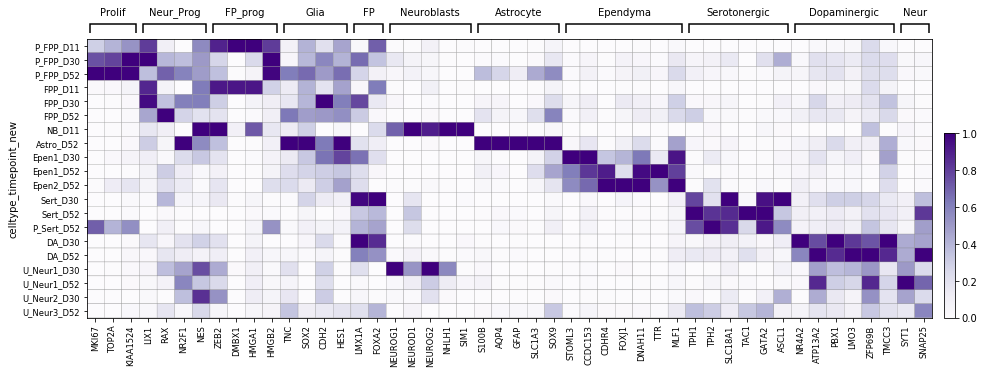

<Figure size 432x288 with 0 Axes>

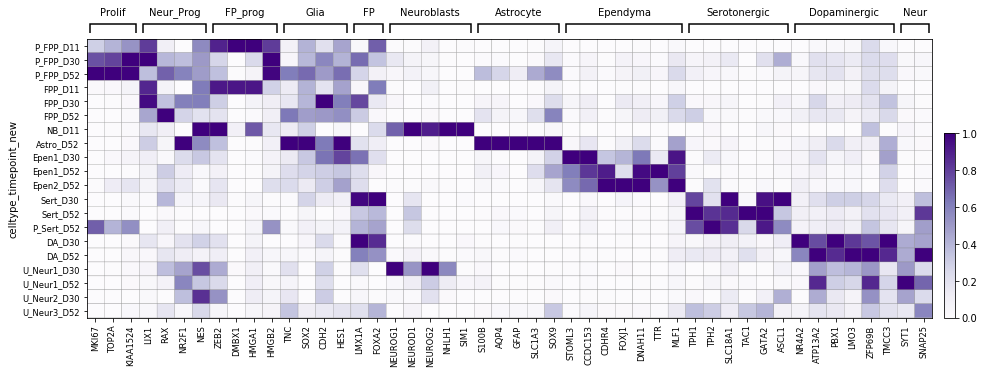

<Figure size 432x288 with 0 Axes>

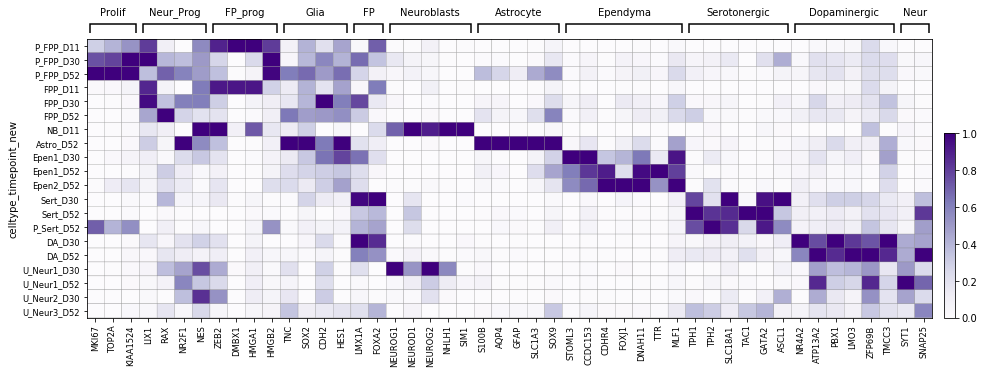

In [32]:
Proliferating = ['MKI67', 'TOP2A', 'KIAA1524']
Neural_Prog = ['LIX1', 'RAX', 'NR2F1', 'NES',]
FP_prog = ['ZEB2', 'DMBX1','HMGA1', 'HMGB2']
Glia = ['TNC', 'SOX2', 'CDH2', 'HES1']
FP = ['LMX1A', 'FOXA2']
Astrocytes = ['S100B', 'AQP4', 'GFAP', 'SLC1A3','SOX9']
Ependyma = ['STOML3','CCDC153','CDHR4','FOXJ1','DNAH11',  'TTR','MLF1']
Serotonergic = ['TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1']
Dopaminergic = ['NR4A2', 'ATP13A2', 'PBX1', 'LMO3',  'ZFP69B', 'TMCC3']
Neuron = ['SYT1', 'SNAP25']
Neuroblasts = ['NEUROG1', 'NEUROD1', 'NEUROG2', 'NHLH1', 'SIM1']

var_group_positions=[(0,2), (3,6), (7, 10),(11,14),(15,16),(17,21),(22,26),(27,33),(34,39),(40,45),(46,47)]
var_group_labels=['Prolif','Neur_Prog', 'FP_prog','Glia','FP','Neuroblasts',
                  'Astrocyte','Ependyma','Serotonergic','Dopaminergic','Neur']

gene_list = Proliferating+Neural_Prog+FP_prog+Glia+FP+Neuroblasts+Astrocytes+Ependyma+Serotonergic+Dopaminergic+Neuron    
# gene_list = ['MKI67', 'TOP2A', 'KIAA1524', 'LIX1', 'RAX', 'NR2F1', 'NES', 'ZEB2', 'DMBX1','HMGA1', 'HMGB2', 'TNC', 'SOX2', 'CDH2', 
#        'HES1', 'LMX1A', 'FOXA2','S100B', 'AQP4', 'GFAP', 'SLC1A3','SOX9', 'STOML3','CCDC153','CDHR4','FOXJ1','DNAH11',
#        'TTR','MLF1', 'TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1','NR4A2', 'ATP13A2', 'PBX1', 'LMO3', 
#        'ZFP69B', 'TMCC3', 'SYT1', 'SNAP25']

# var_group_positions=[(0,1), (2,5), (6, 8),(9,12),(13,16),(17,21),(22,28),(29,34),(35,40),(41,42)]
# var_group_labels=['FP','FP_prog','Prolif','Neural_Prog', 'Glia',
#                   'Astrocyte','Ependyma','Serotonergic','Dopaminergic','Neuron']

# gene_list = FP+FP_prog+Proliferating+Neural_Prog+Glia+Astrocytes+Ependyma+Serotonergic+Dopaminergic+Neuron      


for time_point in ['D11','D30','D52']:
    figure()
    sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint_new', standard_scale='var', cmap='Purples',
                    var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

In [33]:
adata.obs['celltype_timepoint_new_treatment'] = (adata.obs.apply(lambda x: x['celltype_timepoint_new']+'_'+x['treatment'], axis=1))

In [34]:
adata.obs

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                     
ATCGAGTTCAAACGGG-1-60     60  HPSI0514i-fiaj_1                 8.347827   
ACCAGTAAGACCTAGG-1-81     81  HPSI0115i-aoxv_1                 8.043984   
GCTGCAGCAACCGCCA-1-46     46  HPSI0214i-poih_2                 6.579251   
AACTCCCTCGACAGCC-1-66     66  HPSI0414i-mita_1                 7.980024   
CGTCCATGTAGGCTGA-1-53     53  HPSI0115i-paim_1                 7.807103   
...                      ...               ...                      ...   
TTCTTAGTCTTCGGTC-1-123   123  HPSI0513i-sucd_3                 6.546785   
TGAGGGAGTACCCAAT-1-79     79  HPSI0414i-mita_1                 8.063378   
TCAGATGCATGACGGA-1-120   120  HPSI1113i-hayt_3                 7.909122   
ACTTTCAAGACCGGAT-1-26     26  HPSI1014i-eesb_1                 7.429521   
TACACGAAGTGTCCCG-1-145   145  HPSI0114i-zapk_2                 7.689371   

                        log1p_total_counts  log1p_total_counts_mito  \
index                                                                 
ATCGAGTTCAAACGGG-1-60             9.487972                 5.998937   
ACCAGTAAGACCTAGG-1-81             9.088625                 5.181784   
GCTGCAGCAACCGCCA-1-46             7.176255                 2.890372   
AACTCCCTCGACAGCC-1-66             9.723763                 5.087596   
CGTCCATGTAGGCTGA-1-53             9.137662                 4.969813   
...                                    ...                      ...   
TTCTTAGTCTTCGGTC-1-123            6.841616                 4.499810   
TGAGGGAGTACCCAAT-1-79             9.085910                 5.105946   
TCAGATGCATGACGGA-1-120            9.296977                 5.442418   
ACTTTCAAGACCGGAT-1-26             8.397959                 4.691348   
TACACGAAGTGTCCCG-1-145            8.643826                 4.859812   

                        n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                    
ATCGAGTTCAAACGGG-1-60                4220                    29.721949   
ACCAGTAAGACCTAGG-1-81                3114                    34.745284   
GCTGCAGCAACCGCCA-1-46                 719                    44.070390   
AACTCCCTCGACAGCC-1-66                2921                    58.686935   
CGTCCATGTAGGCTGA-1-53                2457                    52.645730   
...                                   ...                          ...   
TTCTTAGTCTTCGGTC-1-123                696                    35.828877   
TGAGGGAGTACCCAAT-1-79                3175                    36.787858   
TCAGATGCATGACGGA-1-120               2721                    50.091709   
ACTTTCAAGACCGGAT-1-26                1684                    46.382691   
TACACGAAGTGTCCCG-1-145               2184                    39.901304   

                        pct_counts_in_top_200_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     38.366543   
ACCAGTAAGACCTAGG-1-81                     45.882752   
GCTGCAGCAACCGCCA-1-46                     59.831676   
AACTCCCTCGACAGCC-1-66                     68.406248   
CGTCCATGTAGGCTGA-1-53                     61.916541   
...                                             ...   
TTCTTAGTCTTCGGTC-1-123                    46.951872   
TGAGGGAGTACCCAAT-1-79                     46.777665   
TCAGATGCATGACGGA-1-120                    60.409024   
ACTTTCAAGACCGGAT-1-26                     57.944557   
TACACGAAGTGTCCCG-1-145                    49.841382   

                        pct_counts_in_top_500_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     53.488901   
ACCAGTAAGACCTAGG-1-81                     60.747769   
GCTGCAGCAACCGCCA-1-46                     83.244070   
AACTCCCTCGACAGCC-1-66                     78.795859   
CGTCCATGTAGGCTGA-1-53                     74.166487   
...                                             ...   
TTCT

In [35]:
ordering = ["P_FPP","FPP","NB","Astro", "Epen1","Epen2","Sert","P_Sert","DA","U_Neur1","U_Neur2","U_Neur3"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]
ordering = [x+'_'+y for x in ordering for y in ['NONE','ROT']]

In [36]:
cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint_new_treatment'] = adata.obs['celltype_timepoint_new_treatment'].astype(cat_type)

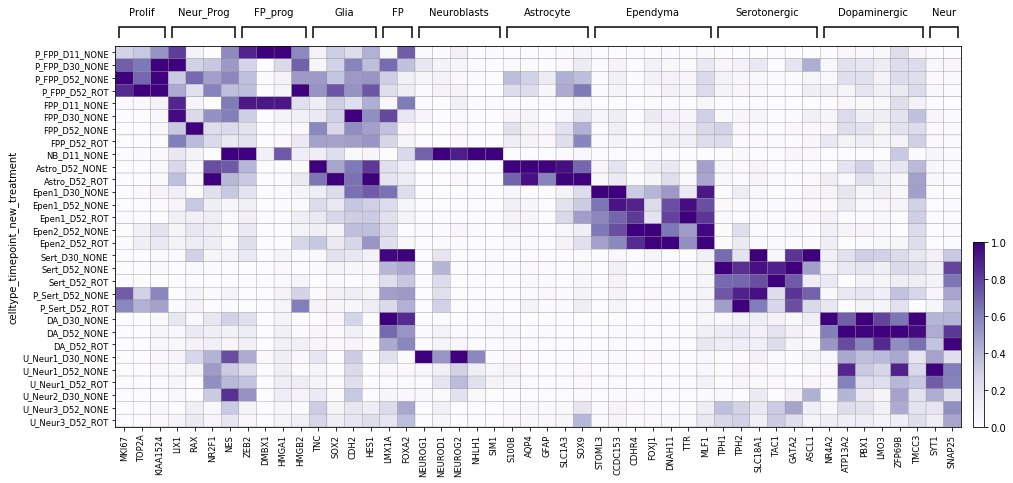

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[15.36, 0, 0.2])

In [37]:
sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint_new_treatment', standard_scale='var', cmap='Purples',
                    var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

In [38]:
gene_list = ['SLC18A1','PBX1','EN1','KLHL1','TMCC3','PITX3','TH','GRIK3','CHL1', 'CAMK2N1','SLC10A4','KCNIP4','PRKCA','ARG2','ERC2','FGF13','IGF1',
       'NTSR1','EPHA5','PTPN5','CHRNA4','GRIA3','NR4A2', 'BNC2','SLC18A2', 'CALB1', 'ASB4', 'SNCA','CDK14','SLC6A3', 'VGF', 'TUB', 'PRRT4', 'CPEB3', 'KLHL13', 
       'KCNJ6', 'NETO2', 'GRP', 'SCG2','GDAP1', 'CADPS2', 'TMEM255A', 'PRICKLE2', 
      'LGI1','CHMP3', 'DKK3', 'LMO3', 'SOX6','AMER3','ALDH1A1', 'PRL', 'DRD2', 'ABCC8', 'RET']

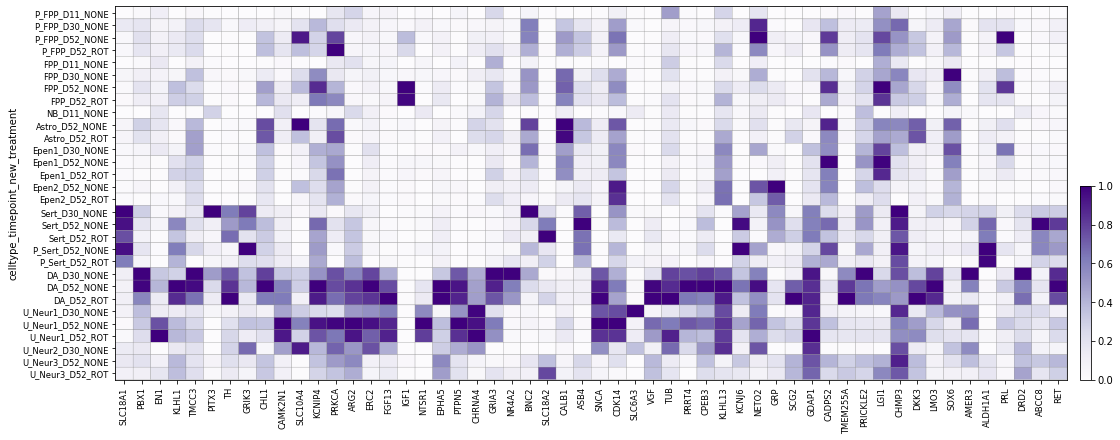

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[17.28, 0, 0.2])

In [39]:
sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint_new_treatment', standard_scale='var', cmap='Purples',
                    
                     var_group_rotation=0)

In [40]:
fig_format = 'png'
# fig_format = 'pdf'
sc.set_figure_params(dpi_save=200,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 5,4

plotting_fcn = sc.pl.umap

In [41]:
adata.obs

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                     
ATCGAGTTCAAACGGG-1-60     60  HPSI0514i-fiaj_1                 8.347827   
ACCAGTAAGACCTAGG-1-81     81  HPSI0115i-aoxv_1                 8.043984   
GCTGCAGCAACCGCCA-1-46     46  HPSI0214i-poih_2                 6.579251   
AACTCCCTCGACAGCC-1-66     66  HPSI0414i-mita_1                 7.980024   
CGTCCATGTAGGCTGA-1-53     53  HPSI0115i-paim_1                 7.807103   
...                      ...               ...                      ...   
TTCTTAGTCTTCGGTC-1-123   123  HPSI0513i-sucd_3                 6.546785   
TGAGGGAGTACCCAAT-1-79     79  HPSI0414i-mita_1                 8.063378   
TCAGATGCATGACGGA-1-120   120  HPSI1113i-hayt_3                 7.909122   
ACTTTCAAGACCGGAT-1-26     26  HPSI1014i-eesb_1                 7.429521   
TACACGAAGTGTCCCG-1-145   145  HPSI0114i-zapk_2                 7.689371   

                        log1p_total_counts  log1p_total_counts_mito  \
index                                                                 
ATCGAGTTCAAACGGG-1-60             9.487972                 5.998937   
ACCAGTAAGACCTAGG-1-81             9.088625                 5.181784   
GCTGCAGCAACCGCCA-1-46             7.176255                 2.890372   
AACTCCCTCGACAGCC-1-66             9.723763                 5.087596   
CGTCCATGTAGGCTGA-1-53             9.137662                 4.969813   
...                                    ...                      ...   
TTCTTAGTCTTCGGTC-1-123            6.841616                 4.499810   
TGAGGGAGTACCCAAT-1-79             9.085910                 5.105946   
TCAGATGCATGACGGA-1-120            9.296977                 5.442418   
ACTTTCAAGACCGGAT-1-26             8.397959                 4.691348   
TACACGAAGTGTCCCG-1-145            8.643826                 4.859812   

                        n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                    
ATCGAGTTCAAACGGG-1-60                4220                    29.721949   
ACCAGTAAGACCTAGG-1-81                3114                    34.745284   
GCTGCAGCAACCGCCA-1-46                 719                    44.070390   
AACTCCCTCGACAGCC-1-66                2921                    58.686935   
CGTCCATGTAGGCTGA-1-53                2457                    52.645730   
...                                   ...                          ...   
TTCTTAGTCTTCGGTC-1-123                696                    35.828877   
TGAGGGAGTACCCAAT-1-79                3175                    36.787858   
TCAGATGCATGACGGA-1-120               2721                    50.091709   
ACTTTCAAGACCGGAT-1-26                1684                    46.382691   
TACACGAAGTGTCCCG-1-145               2184                    39.901304   

                        pct_counts_in_top_200_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     38.366543   
ACCAGTAAGACCTAGG-1-81                     45.882752   
GCTGCAGCAACCGCCA-1-46                     59.831676   
AACTCCCTCGACAGCC-1-66                     68.406248   
CGTCCATGTAGGCTGA-1-53                     61.916541   
...                                             ...   
TTCTTAGTCTTCGGTC-1-123                    46.951872   
TGAGGGAGTACCCAAT-1-79                     46.777665   
TCAGATGCATGACGGA-1-120                    60.409024   
ACTTTCAAGACCGGAT-1-26                     57.944557   
TACACGAAGTGTCCCG-1-145                    49.841382   

                        pct_counts_in_top_500_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     53.488901   
ACCAGTAAGACCTAGG-1-81                     60.747769   
GCTGCAGCAACCGCCA-1-46                     83.244070   
AACTCCCTCGACAGCC-1-66                     78.795859   
CGTCCATGTAGGCTGA-1-53                     74.166487   
...                                             ...   
TTCT

In [42]:
old_to_new = dict(
    DA_D52 = 'DA',
    FPP_D30 = 'FPP',
    DA_D30 = 'DA',
    P_FPP_D11 = 'P_FPP', 
    FPP_D52 = 'FPP',
    Sert_D52 = 'Sert',
    FPP_D11 = 'FPP', 
    NB_D11 = 'NB', 
    U_Neur1_D30 = 'U_Neur1', 
    P_FPP_D30 = 'P_FPP',
    Epen1_D52 = 'Epen1', 
    Astro_D52 = 'Astro', 
    U_Neur1_D52 = 'U_Neur1', 
    Epen1_D30 = 'Epen1', 
    P_FPP_D52 = 'P_FPP',
    U_Neur2_D30 = 'U_Neur2', 
    Sert_D30 = 'Sert', 
    Epen2_D52 = 'Epen2', 
    U_Neur3_D52 = 'U_Neur3',
    P_Sert_D52 = 'P_Sert'
)
adata.obs['celltype_new'] = (
    adata.obs['celltype_timepoint_new']
    .map(old_to_new)
    .astype('category')
)

In [43]:
adata.obs

batch          donor_id  log1p_n_genes_by_counts  \
index                                                                     
ATCGAGTTCAAACGGG-1-60     60  HPSI0514i-fiaj_1                 8.347827   
ACCAGTAAGACCTAGG-1-81     81  HPSI0115i-aoxv_1                 8.043984   
GCTGCAGCAACCGCCA-1-46     46  HPSI0214i-poih_2                 6.579251   
AACTCCCTCGACAGCC-1-66     66  HPSI0414i-mita_1                 7.980024   
CGTCCATGTAGGCTGA-1-53     53  HPSI0115i-paim_1                 7.807103   
...                      ...               ...                      ...   
TTCTTAGTCTTCGGTC-1-123   123  HPSI0513i-sucd_3                 6.546785   
TGAGGGAGTACCCAAT-1-79     79  HPSI0414i-mita_1                 8.063378   
TCAGATGCATGACGGA-1-120   120  HPSI1113i-hayt_3                 7.909122   
ACTTTCAAGACCGGAT-1-26     26  HPSI1014i-eesb_1                 7.429521   
TACACGAAGTGTCCCG-1-145   145  HPSI0114i-zapk_2                 7.689371   

                        log1p_total_counts  log1p_total_counts_mito  \
index                                                                 
ATCGAGTTCAAACGGG-1-60             9.487972                 5.998937   
ACCAGTAAGACCTAGG-1-81             9.088625                 5.181784   
GCTGCAGCAACCGCCA-1-46             7.176255                 2.890372   
AACTCCCTCGACAGCC-1-66             9.723763                 5.087596   
CGTCCATGTAGGCTGA-1-53             9.137662                 4.969813   
...                                    ...                      ...   
TTCTTAGTCTTCGGTC-1-123            6.841616                 4.499810   
TGAGGGAGTACCCAAT-1-79             9.085910                 5.105946   
TCAGATGCATGACGGA-1-120            9.296977                 5.442418   
ACTTTCAAGACCGGAT-1-26             8.397959                 4.691348   
TACACGAAGTGTCCCG-1-145            8.643826                 4.859812   

                        n_genes_by_counts  pct_counts_in_top_100_genes  \
index                                                                    
ATCGAGTTCAAACGGG-1-60                4220                    29.721949   
ACCAGTAAGACCTAGG-1-81                3114                    34.745284   
GCTGCAGCAACCGCCA-1-46                 719                    44.070390   
AACTCCCTCGACAGCC-1-66                2921                    58.686935   
CGTCCATGTAGGCTGA-1-53                2457                    52.645730   
...                                   ...                          ...   
TTCTTAGTCTTCGGTC-1-123                696                    35.828877   
TGAGGGAGTACCCAAT-1-79                3175                    36.787858   
TCAGATGCATGACGGA-1-120               2721                    50.091709   
ACTTTCAAGACCGGAT-1-26                1684                    46.382691   
TACACGAAGTGTCCCG-1-145               2184                    39.901304   

                        pct_counts_in_top_200_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     38.366543   
ACCAGTAAGACCTAGG-1-81                     45.882752   
GCTGCAGCAACCGCCA-1-46                     59.831676   
AACTCCCTCGACAGCC-1-66                     68.406248   
CGTCCATGTAGGCTGA-1-53                     61.916541   
...                                             ...   
TTCTTAGTCTTCGGTC-1-123                    46.951872   
TGAGGGAGTACCCAAT-1-79                     46.777665   
TCAGATGCATGACGGA-1-120                    60.409024   
ACTTTCAAGACCGGAT-1-26                     57.944557   
TACACGAAGTGTCCCG-1-145                    49.841382   

                        pct_counts_in_top_500_genes  \
index                                                 
ATCGAGTTCAAACGGG-1-60                     53.488901   
ACCAGTAAGACCTAGG-1-81                     60.747769   
GCTGCAGCAACCGCCA-1-46                     83.244070   
AACTCCCTCGACAGCC-1-66                     78.795859   
CGTCCATGTAGGCTGA-1-53                     74.166487   
...                                             ...   
TTCT

In [44]:
from matplotlib import cm, colors

vega_20 = list(map(colors.to_hex, cm.tab20.colors))

# specify a color map, then turn this into a palette for each time_point
# will depending on the order of the celltypes, I think.

color_dict = dict()

celltype_list = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','P_Sert','Epen2','U_Neur1','U_Neur2','U_Neur3']
palette = [vega_20[idx] for idx in range(len(celltype_list))]

In [45]:
print(palette)
print(palette[0])
# Astro:8, DA:4, Epen1:7, Epen2:9, FPP:1, NB:2, P_FPP:0, P_Sert:10, Sert:5, U_Neur1:3, U_Neur2:6, U_Neur3:11
myorder = [8,4,7,9,1,2,0,10,5,3,6,11]
mypalette = [palette[i] for i in myorder]
# mypalette
print(mypalette)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94']
#1f77b4
['#9467bd', '#2ca02c', '#ff9896', '#c5b0d5', '#aec7e8', '#ff7f0e', '#1f77b4', '#8c564b', '#98df8a', '#ffbb78', '#d62728', '#c49c94']


In [46]:
states = adata.obs['donor_id'].cat.categories == 'HPSI0514i-fiaj_1'
import numpy as np
np.where(states)[0]

array([87])

In [47]:
states = adata.obs['donor_id'].cat.categories == 'HPSI1014i-eesb_1'
import numpy as np
np.where(states)[0]

array([191])

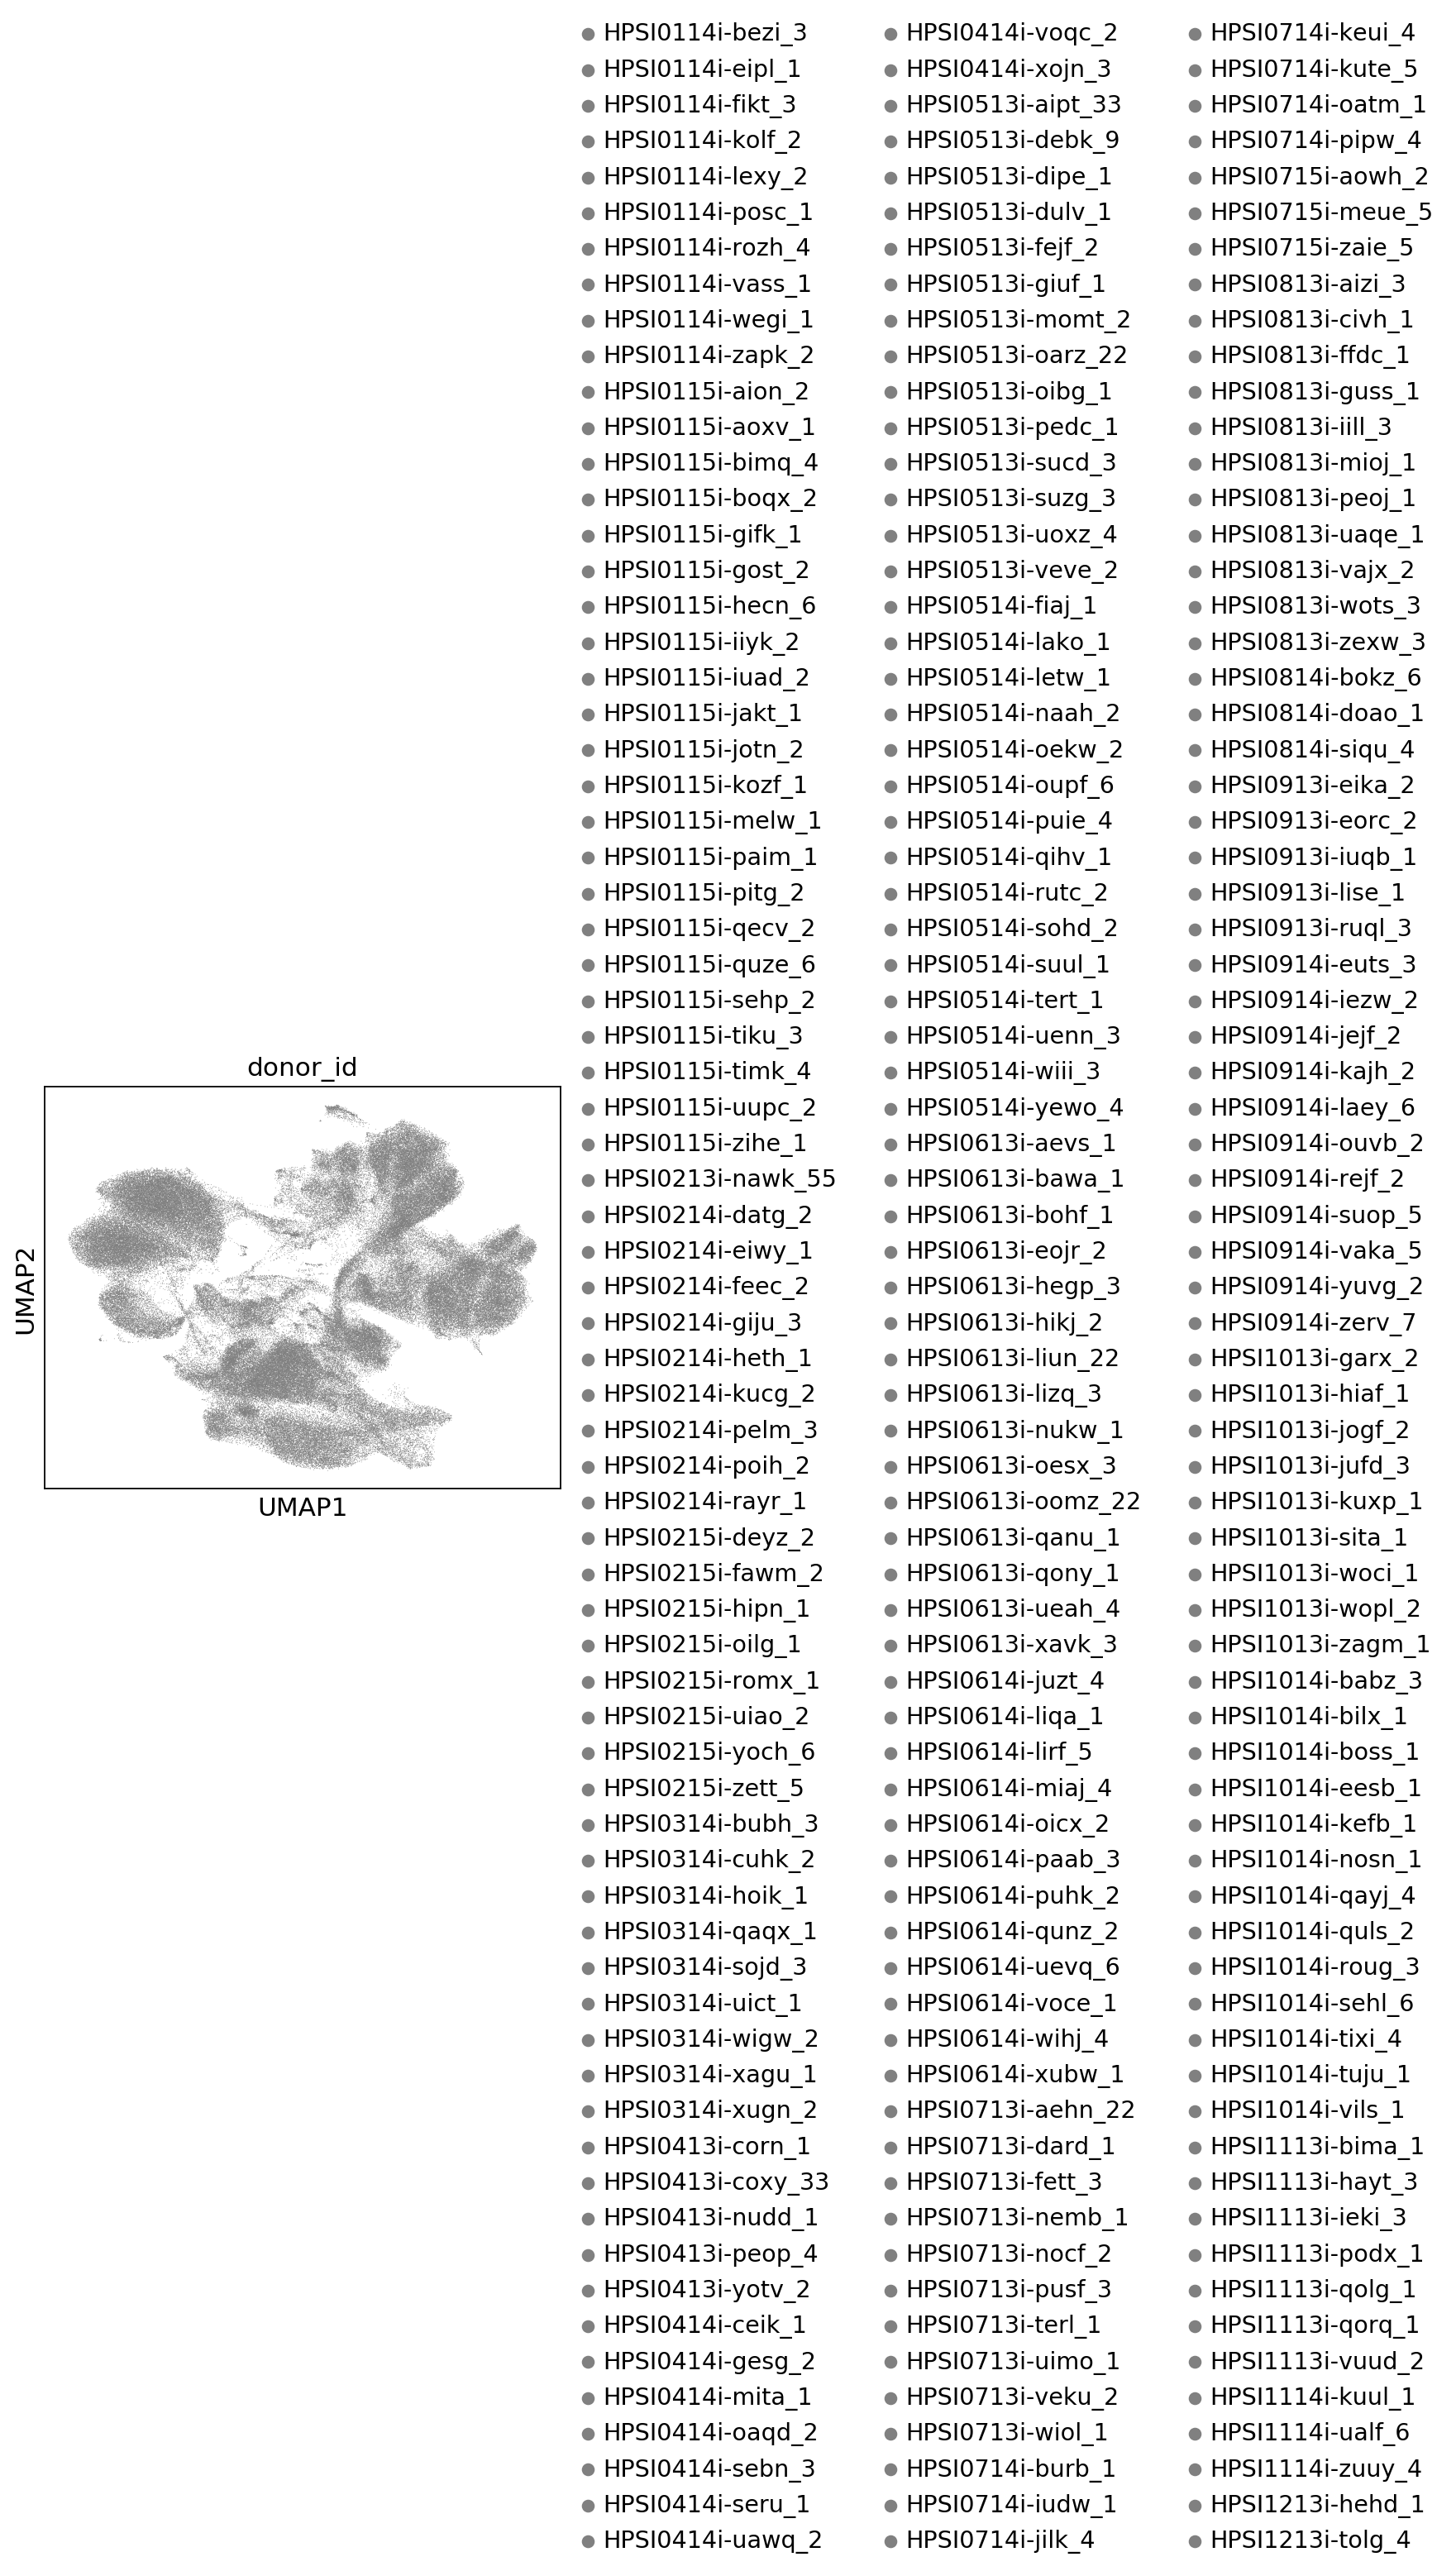

In [48]:
plotting_fcn(adata, color='donor_id')

In [49]:
for i in range(len(states)):
    adata.uns['donor_id_colors'][i] = 'lightgrey'
# adata.uns['donor_id_colors'][87] = '#17becf'
adata.uns['donor_id_colors'][191] = '#ffbb78'

In [50]:
dim_reduction = 'X_umap'
FS = 16

In [51]:
# neuron_cluster_list = ['pool1_13_noddd_D52_2','pool1_13_noddd_D52_3','pool1_13_noddd_D52_4','pool1_13_noddd_D52_11']
# other_cluster_list = ['pool1_13_noddd_D52_0','pool1_13_noddd_D52_1'] + ['pool1_13_noddd_D52_{}'.format(x) for x in range(5,11)]
time_point = 'D52'
cat_type = pd.CategoricalDtype(categories = adata.obs['donor_id'].cat.categories, ordered=True)
column = 'donor_id_{}'.format(time_point)
adata.obs[column] = (adata.obs
                         .apply(lambda x: x['donor_id'] if x['time_point']==time_point else 'other', axis=1)
                         .astype(cat_type))

In [52]:
donor1 = 'HPSI0514i-fiaj_1'
donor2 = 'HPSI1014i-eesb_1'
donor3 = 'HPSI1213i-hehd_1'

In [53]:
adata.obs['donor_id_D52']

index
ATCGAGTTCAAACGGG-1-60     HPSI0514i-fiaj_1
ACCAGTAAGACCTAGG-1-81                  NaN
GCTGCAGCAACCGCCA-1-46                  NaN
AACTCCCTCGACAGCC-1-66                  NaN
CGTCCATGTAGGCTGA-1-53     HPSI0115i-paim_1
                                ...       
TTCTTAGTCTTCGGTC-1-123                 NaN
TGAGGGAGTACCCAAT-1-79                  NaN
TCAGATGCATGACGGA-1-120    HPSI1113i-hayt_3
ACTTTCAAGACCGGAT-1-26                  NaN
TACACGAAGTGTCCCG-1-145    HPSI0114i-zapk_2
Name: donor_id_D52, Length: 205416, dtype: category
Categories (213, object): [HPSI0114i-bezi_3 < HPSI0114i-eipl_1 < HPSI0114i-fikt_3 < HPSI0114i-kolf_2 ... HPSI1114i-ualf_6 < HPSI1114i-zuuy_4 < HPSI1213i-hehd_1 < HPSI1213i-tolg_4]

Text(0, 0.5, 'UMAP2')

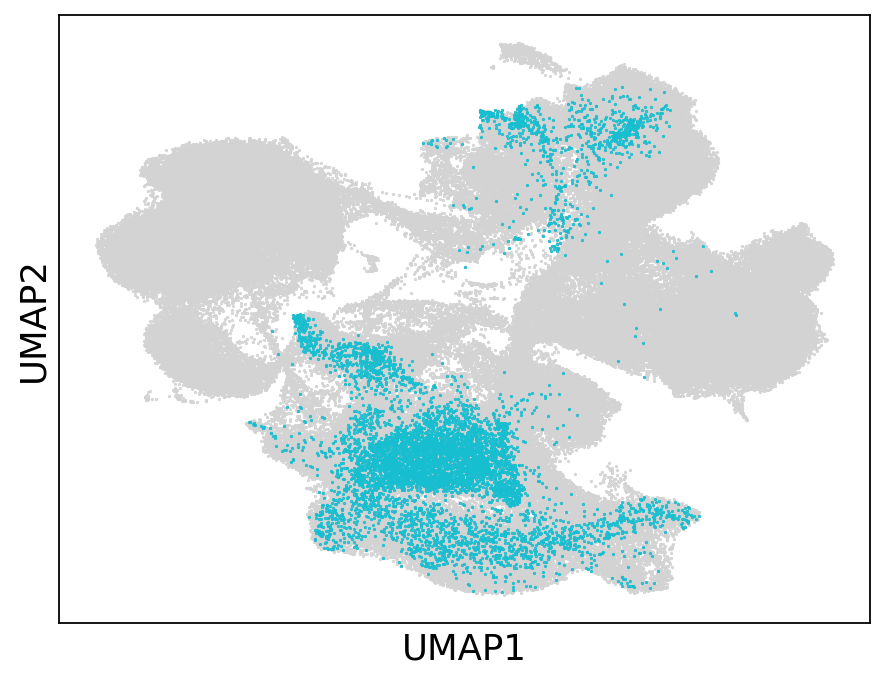

In [54]:
fig = figure(figsize=(6.5,5))
# # make dummy points for the colors for legend 
colors = ['lightcoral','tab:cyan','lightgrey']
for color in colors:
    scatter([],[], c = color, s=45.5)
scatter(adata.obsm[dim_reduction][:,0],adata.obsm[dim_reduction][:,1], c = 'lightgrey', s=0.2)
cells = (adata.obs['donor_id_D52']==donor1)
scatter(adata.obsm[dim_reduction][cells,0],adata.obsm[dim_reduction][cells,1], s=0.2, c ='#17becf')
# legend([''])
xticks([])
yticks([])
xlabel('UMAP1', fontsize=FS)
ylabel('UMAP2', fontsize=FS)

Text(0, 0.5, 'UMAP2')

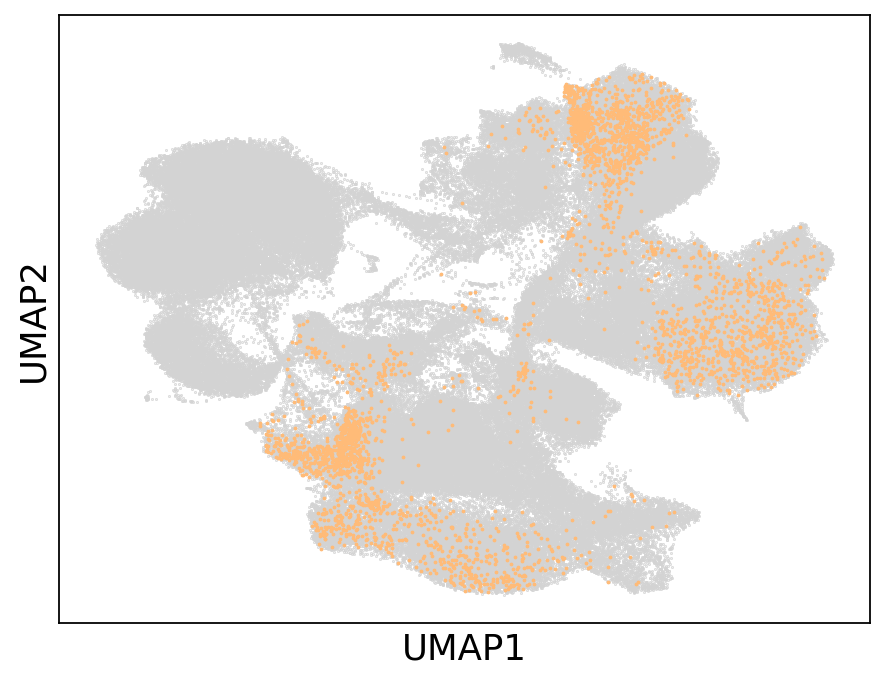

In [55]:
fig = figure(figsize=(6.5,5))
# # make dummy points for the colors for legend 
colors = ['lightcoral','tab:cyan','lightgrey']
for color in colors:
    scatter([],[], c = color, s=45.5)
scatter(adata.obsm[dim_reduction][:,0],adata.obsm[dim_reduction][:,1], c = 'lightgrey', s=0.1)
cells = (adata.obs['donor_id_D52']==donor2)
scatter(adata.obsm[dim_reduction][cells,0],adata.obsm[dim_reduction][cells,1], s=0.5, c='#ffbb78')
# legend([''])
xticks([])
yticks([])
xlabel('UMAP1', fontsize=FS)
ylabel('UMAP2', fontsize=FS)

Text(0, 0.5, 'UMAP2')

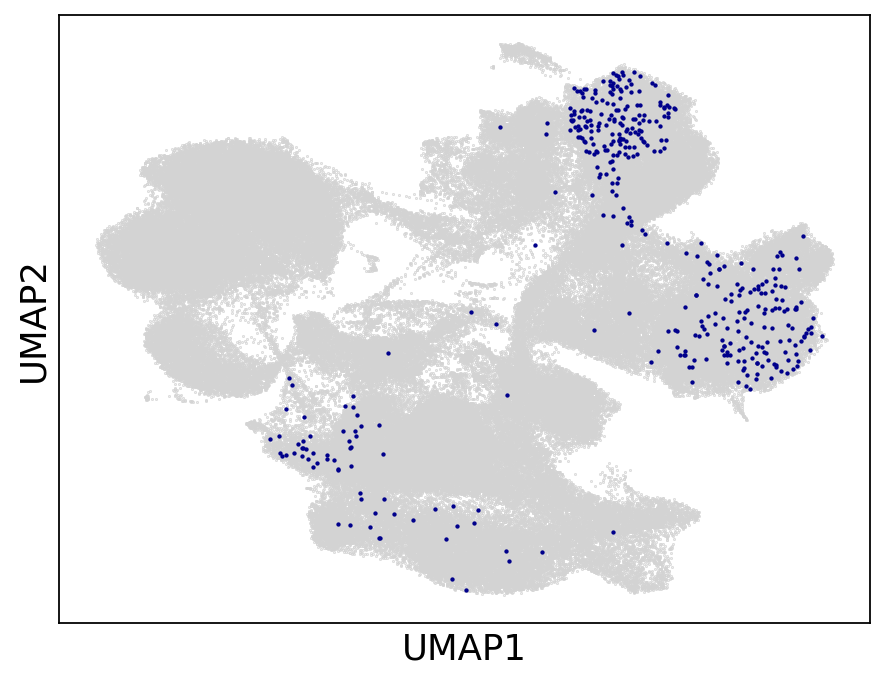

In [56]:
fig = figure(figsize=(6.5,5))
# # make dummy points for the colors for legend 
colors = ['lightcoral','tab:cyan','lightgrey']
for color in colors:
    scatter([],[], c = color, s=45.5)
scatter(adata.obsm[dim_reduction][:,0],adata.obsm[dim_reduction][:,1], c = 'lightgrey', s=0.1)
cells = (adata.obs['donor_id_D52']==donor3)
scatter(adata.obsm[dim_reduction][cells,0],adata.obsm[dim_reduction][cells,1], s=0.9, c='darkblue')
# legend([''])
xticks([])
yticks([])
xlabel('UMAP1', fontsize=FS)
ylabel('UMAP2', fontsize=FS)

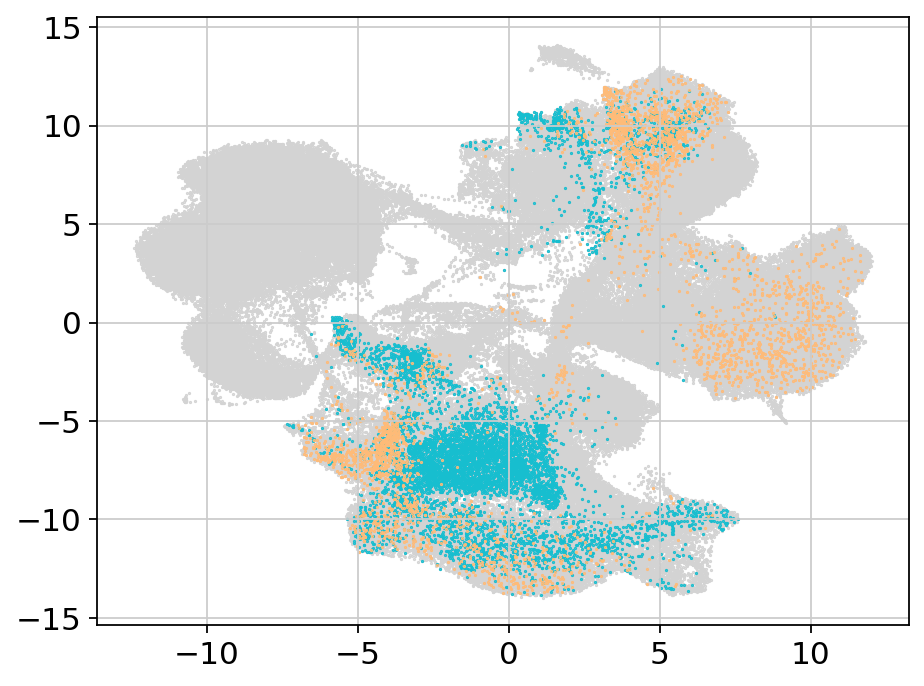

In [57]:
fig = figure(figsize=(6.5,5))
# # make dummy points for the colors for legend 
colors = ['lightcoral','tab:cyan','lightgrey']
for color in colors:
    scatter([],[], c = color, s=45.5)
scatter(adata.obsm[dim_reduction][:,0],adata.obsm[dim_reduction][:,1], c = 'lightgrey', s=0.2)
cells = (adata.obs['donor_id_D52']==donor1)
scatter(adata.obsm[dim_reduction][cells,0],adata.obsm[dim_reduction][cells,1], s=0.2, c ='#17becf')
cells = (adata.obs['donor_id_D52']==donor2)
scatter(adata.obsm[dim_reduction][cells,0],adata.obsm[dim_reduction][cells,1], s=0.2, c='#ffbb78')
# legend([''])
# xticks([])
# yticks([])
# xlabel('UMAP1', fontsize=FS)
# ylabel('UMAP2', fontsize=FS)

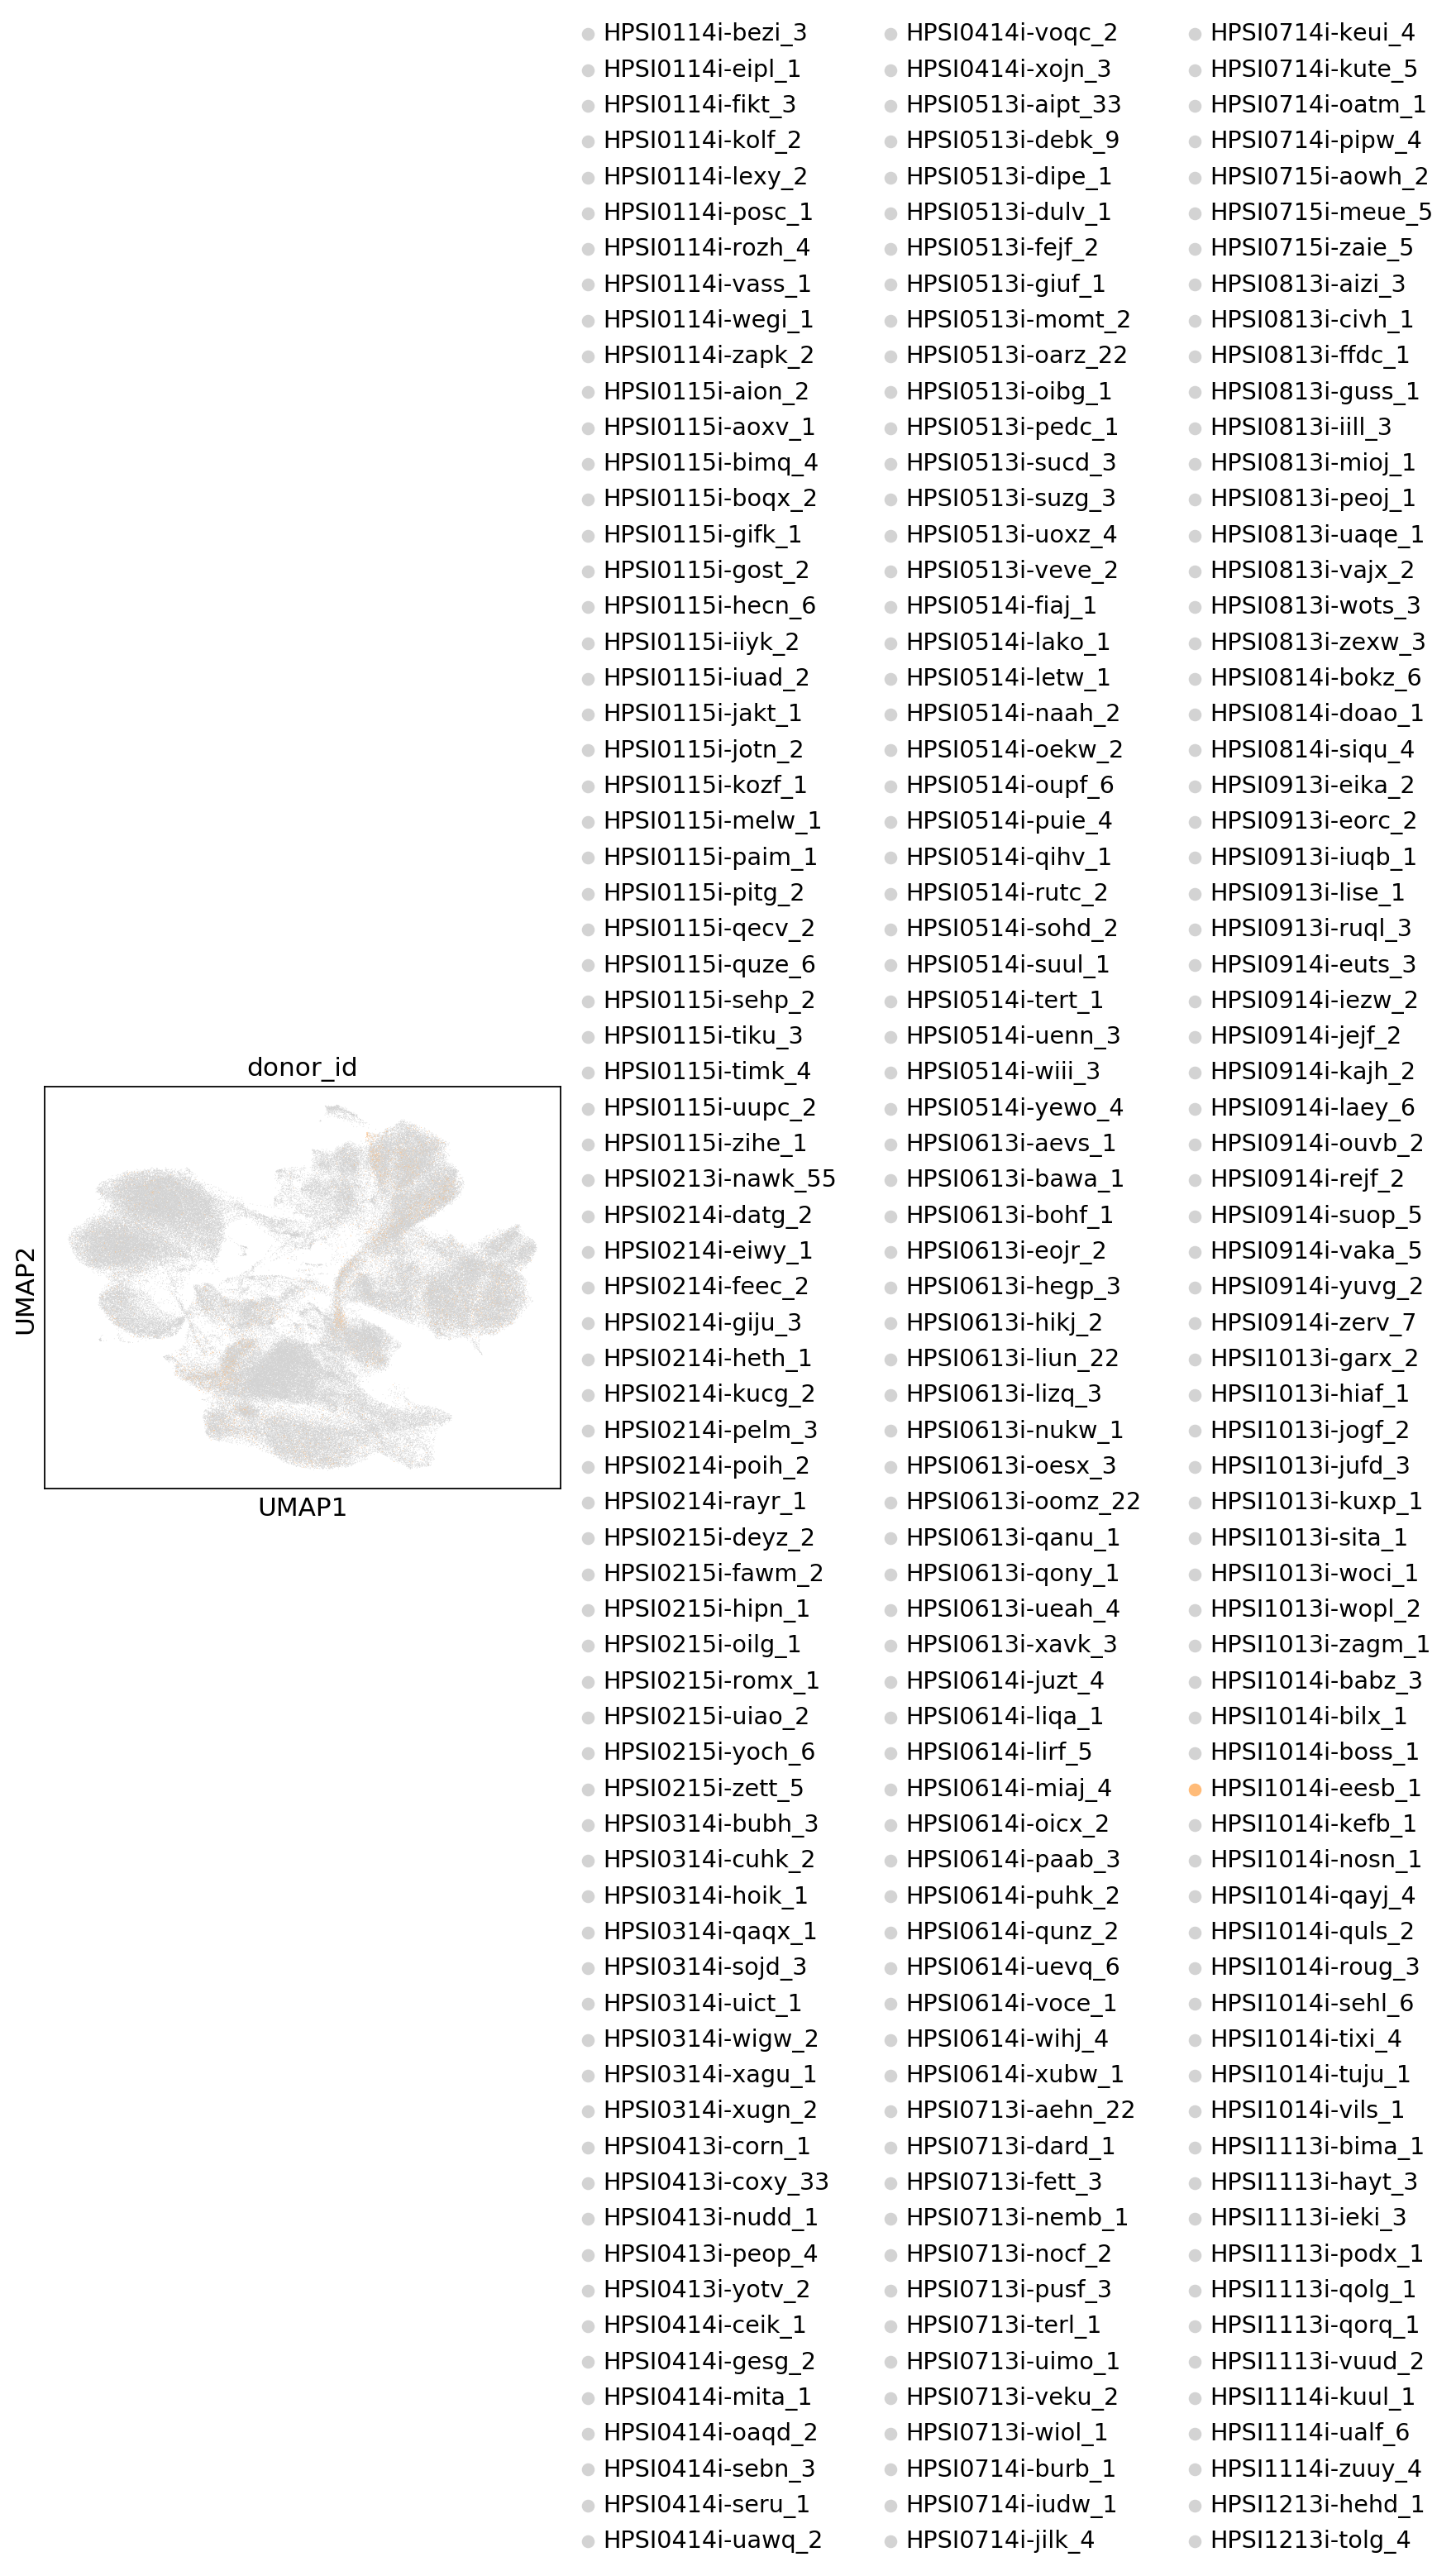

In [58]:
plotting_fcn(adata, color='donor_id')

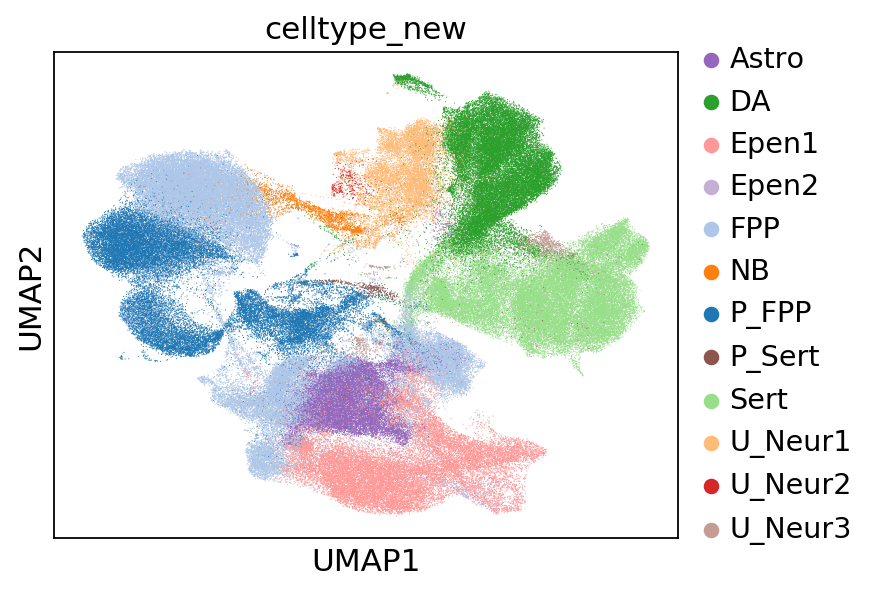

In [59]:
plotting_fcn(adata, color='celltype_new', size=1, palette=mypalette)

In [60]:
adata.uns['celltype_new_colors']

['#9467bd',
 '#2ca02c',
 '#ff9896',
 '#c5b0d5',
 '#aec7e8',
 '#ff7f0e',
 '#1f77b4',
 '#8c564b',
 '#98df8a',
 '#ffbb78',
 '#d62728',
 '#c49c94']

In [61]:
adata.obs['celltype_new'].cat.categories

Index(['Astro', 'DA', 'Epen1', 'Epen2', 'FPP', 'NB', 'P_FPP', 'P_Sert', 'Sert',
       'U_Neur1', 'U_Neur2', 'U_Neur3'],
      dtype='object')

In [62]:
col_prog = 'firebrick'
col_neurons = '#283655'
col_non_neurons = '#66a5ad'

adata.uns['celltype_new_colors'][0] = col_non_neurons
adata.uns['celltype_new_colors'][1] = col_neurons
adata.uns['celltype_new_colors'][2] = col_non_neurons
adata.uns['celltype_new_colors'][3] = col_non_neurons
adata.uns['celltype_new_colors'][4] = col_prog
adata.uns['celltype_new_colors'][5] = col_prog
adata.uns['celltype_new_colors'][6] = col_prog
adata.uns['celltype_new_colors'][7] = col_neurons
adata.uns['celltype_new_colors'][8] = col_neurons
adata.uns['celltype_new_colors'][9] = col_neurons
adata.uns['celltype_new_colors'][10] = col_neurons
adata.uns['celltype_new_colors'][11] = col_neurons

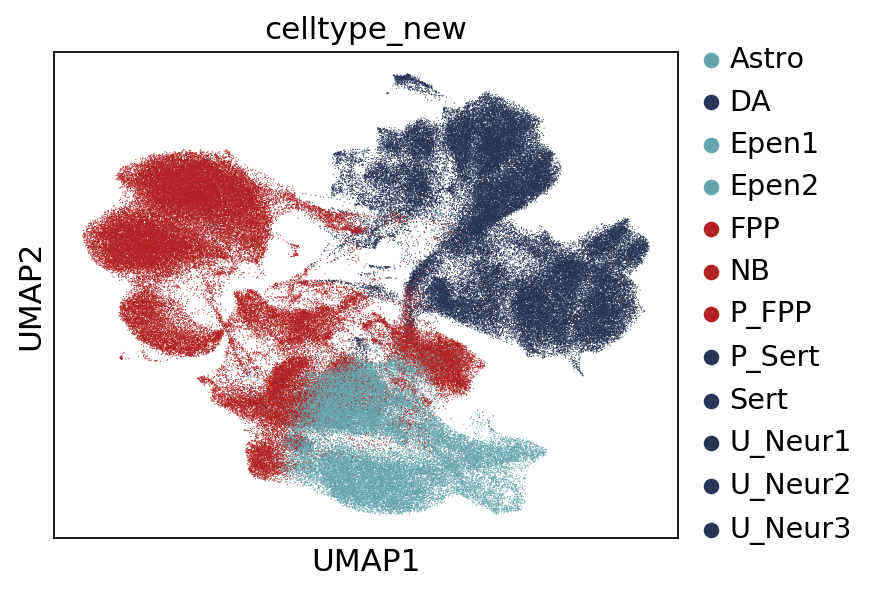

In [63]:
plotting_fcn(adata, color='celltype_new', size=1)

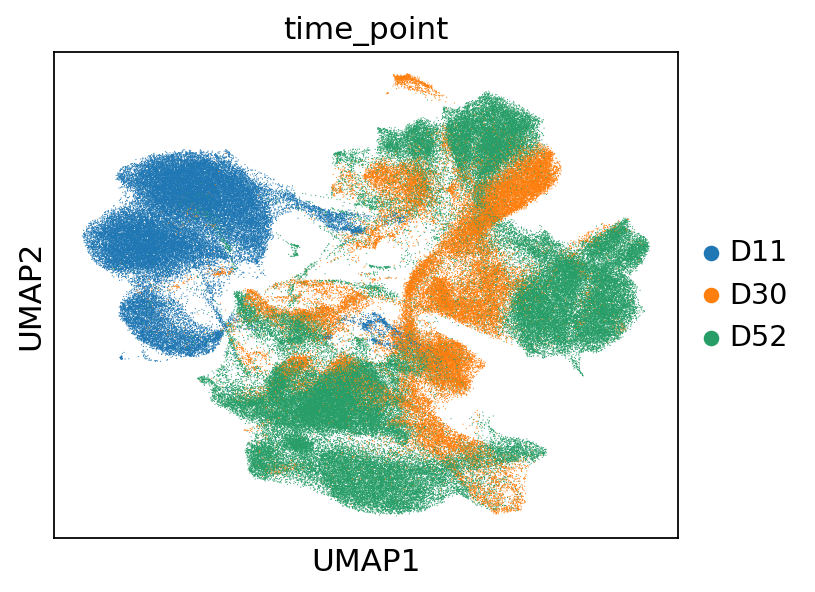

In [64]:
plotting_fcn(adata, color='time_point', size=1)

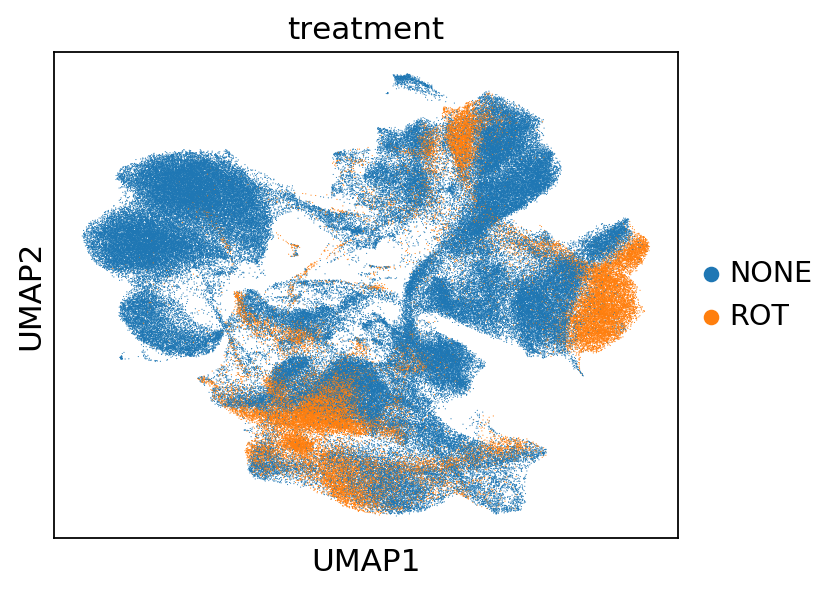

In [65]:
plotting_fcn(adata, color='treatment', size=1)

In [66]:
adata.obs['celltype_new'].unique()

[DA, FPP, P_FPP, Sert, NB, ..., Astro, U_Neur2, Epen2, U_Neur3, P_Sert]
Length: 12
Categories (12, object): [DA, FPP, P_FPP, Sert, ..., U_Neur2, Epen2, U_Neur3, P_Sert]

In [67]:
celltype_list = ['P_FPP','FPP','NB','DA','Sert','Astro','Epen1','P_Sert','Epen2','U_Neur1','U_Neur2','U_Neur3','other']
cat_type = pd.CategoricalDtype(categories = celltype_list, ordered=True)


for time_point in ['D11','D30','D52']:
    column = 'celltype_new_{}'.format(time_point)
    adata.obs[column] = (adata.obs
                         .apply(lambda x: x['celltype_new'] if x['time_point']==time_point else 'other', axis=1)
                         .astype(cat_type))


In [68]:
# adata.obs

In [69]:
# Astro:8, DA:4, Epen1:7, Epen2:9, FPP:1, NB:2, P_FPP:0, P_Sert:10, Sert:5, U_Neur1:3, U_Neur2:6, U_Neur3:11
palette = [vega_20[idx] for idx in range(len(celltype_list))]
myorder1 = [0,1,2,4,5,8,7,10,9,3,6,11,12]
mypalette1 = [palette[i] for i in myorder1]
mypalette1[-1] = 'lightgrey'

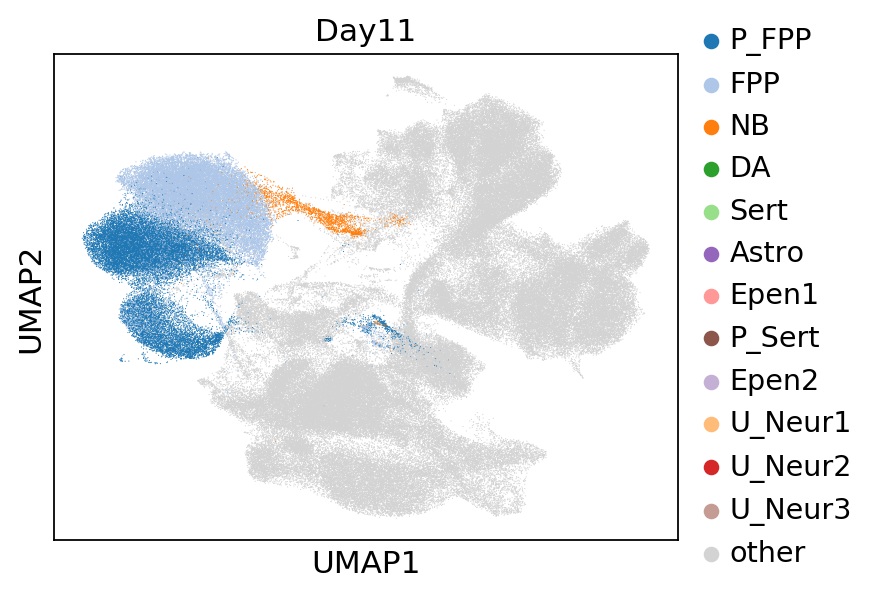

In [70]:
time_point = 'D11'
column = 'celltype_new_{}'.format(time_point)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day11', size=1)

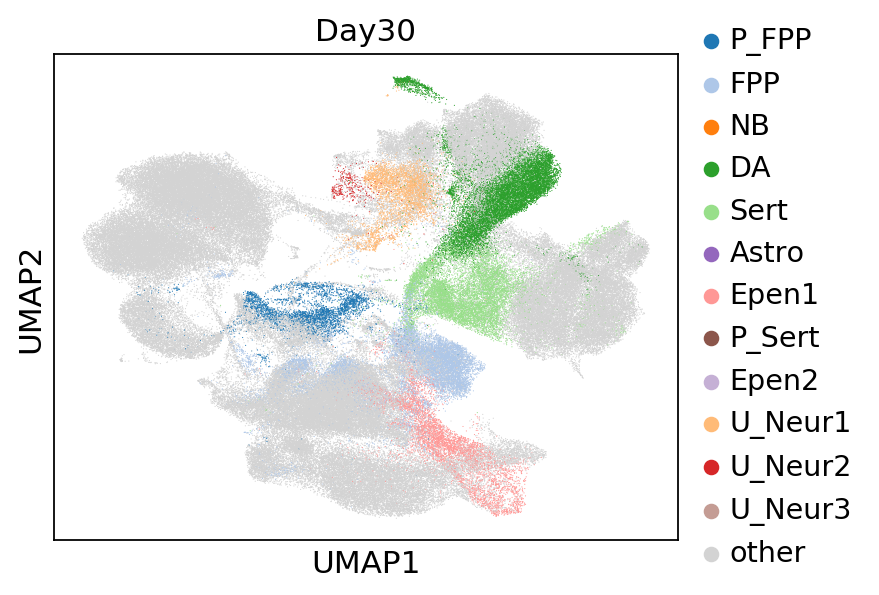

In [71]:
time_point = 'D30'
column = 'celltype_new_{}'.format(time_point)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day30', size=1)

In [72]:
adata.obs['celltype_new_D52'].cat.categories

Index(['P_FPP', 'FPP', 'NB', 'DA', 'Sert', 'Astro', 'Epen1', 'P_Sert', 'Epen2',
       'U_Neur1', 'U_Neur2', 'U_Neur3', 'other'],
      dtype='object')

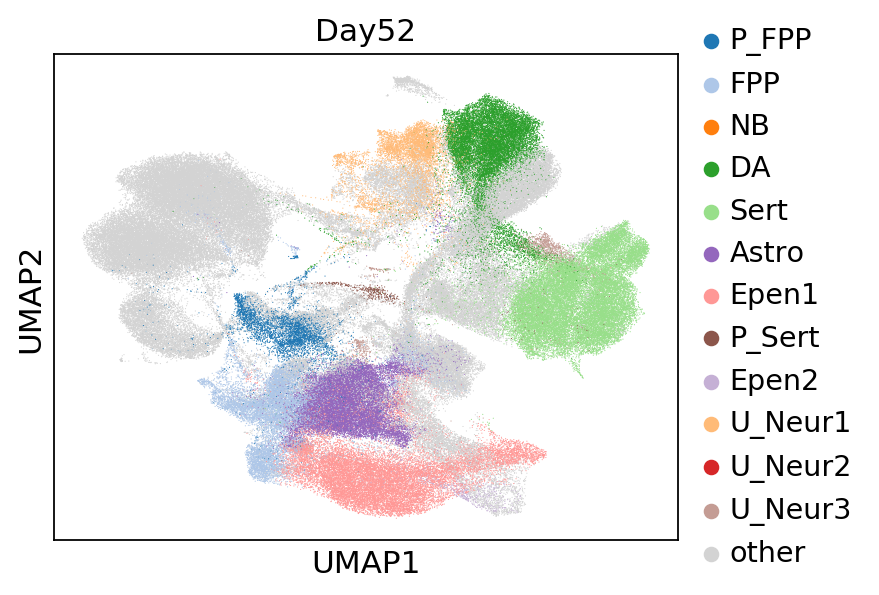

In [73]:
time_point = 'D52'
column = 'celltype_new_{}'.format(time_point)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day52', size=1)

In [74]:
adata.uns['celltype_new_D52_colors']

['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#2ca02c',
 '#98df8a',
 '#9467bd',
 '#ff9896',
 '#8c564b',
 '#c5b0d5',
 '#ffbb78',
 '#d62728',
 '#c49c94',
 '#d3d3d3']

In [75]:
adata.obs['celltype_new_D52'].cat.categories

Index(['P_FPP', 'FPP', 'NB', 'DA', 'Sert', 'Astro', 'Epen1', 'P_Sert', 'Epen2',
       'U_Neur1', 'U_Neur2', 'U_Neur3', 'other'],
      dtype='object')

In [76]:
col = 'lightgrey'

adata.uns['celltype_new_D52_colors'][0] = col
adata.uns['celltype_new_D52_colors'][1] = col
adata.uns['celltype_new_D52_colors'][2] = col
# adata.uns['celltype_new_D52_colors'][3] = col
# adata.uns['celltype_new_D52_colors'][4] = col
adata.uns['celltype_new_D52_colors'][5] = col
adata.uns['celltype_new_D52_colors'][6] = col
adata.uns['celltype_new_D52_colors'][7] = col
adata.uns['celltype_new_D52_colors'][8] = col
adata.uns['celltype_new_D52_colors'][9] = col
adata.uns['celltype_new_D52_colors'][10] = col
adata.uns['celltype_new_D52_colors'][11] = col

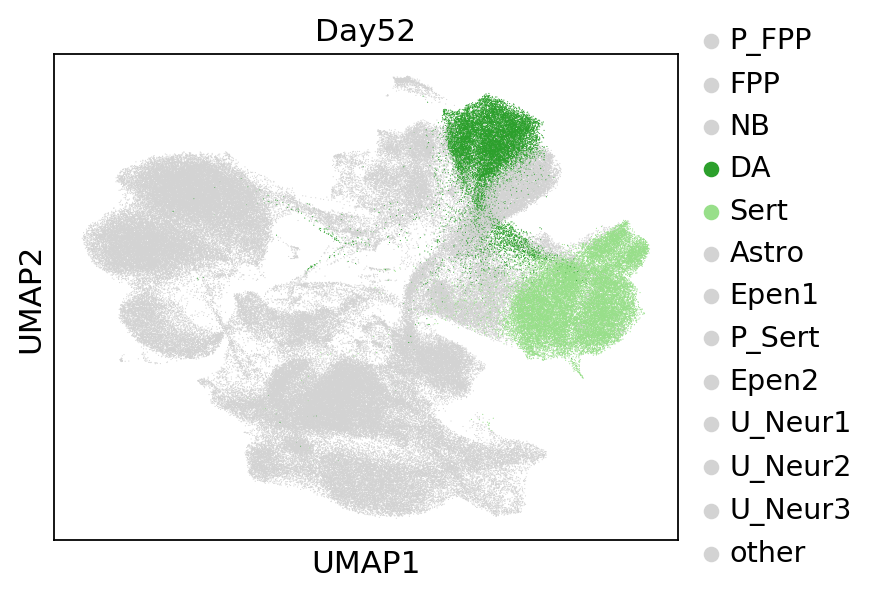

In [77]:
plotting_fcn(adata, color='celltype_new_D52', title='Day52', size=1)

In [78]:
for treatment in ['NONE','ROT']:
    column = 'celltype_new_D52_{}'.format(treatment)
    adata.obs[column] = (adata.obs
                         .apply(lambda x: x['celltype_new'] if x['time_point']=='D52' and x['treatment'] == treatment else 'other', axis=1)
                         .astype(cat_type))

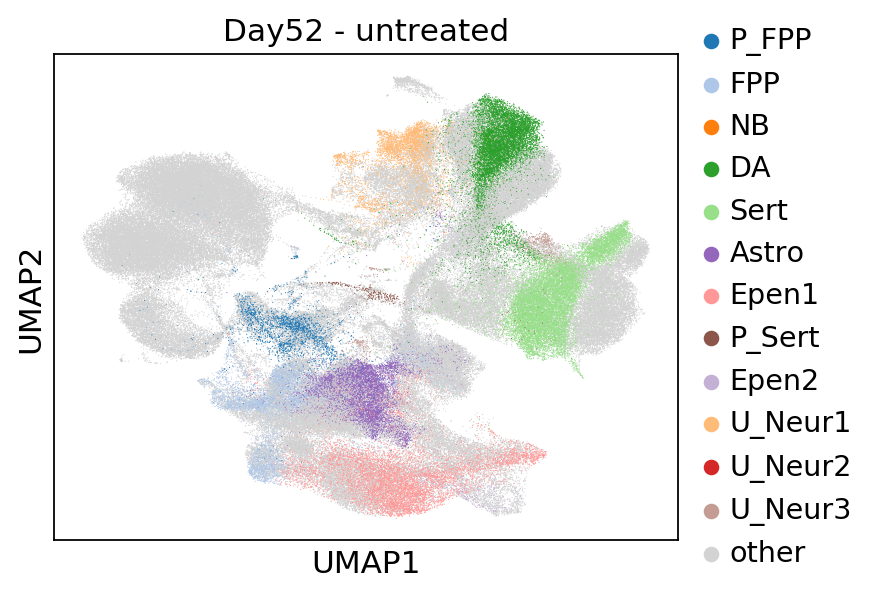

In [79]:
treatment = 'NONE'
column = 'celltype_new_D52_{}'.format(treatment)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day52 - untreated', size=1)

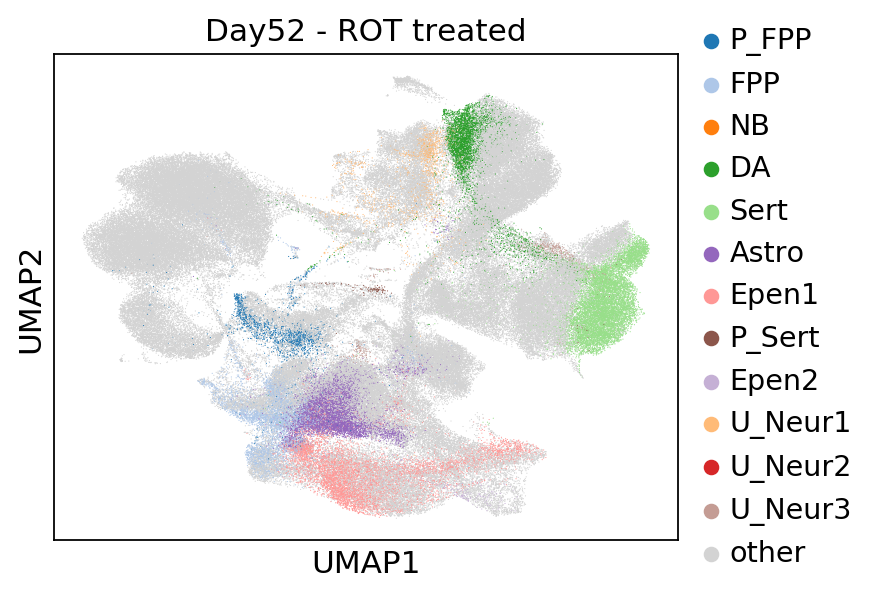

In [80]:
treatment = 'ROT'
column = 'celltype_new_D52_{}'.format(treatment)
plotting_fcn(adata, color=column, palette=mypalette1,title='Day52 - ROT treated', size=1)

In [ ]:
# from matplotlib import cm, colors

# vega_20 = list(map(colors.to_hex, cm.tab20.colors))

# # specify a color map, then turn this into a palette for each time_point
# # will depending on the order of the celltypes, I think.

# color_dict = dict()

# celltype_list = ['P_FPP','FPP','NB','CHem','DA','Sert','Astro','Epen1','P_Sert','Epen2','unknown','other']
# palette = [vega_20[idx] for idx in range(len(celltype_list))]
# palette[-1] = 'lightgrey'

In [ ]:
print(palette)
print(palette[6])
myorder = [0,1,2,3,5,11,4,6,7,8,9,10]
mypalette = [palette[i] for i in myorder]
# mypalette
print(mypalette)

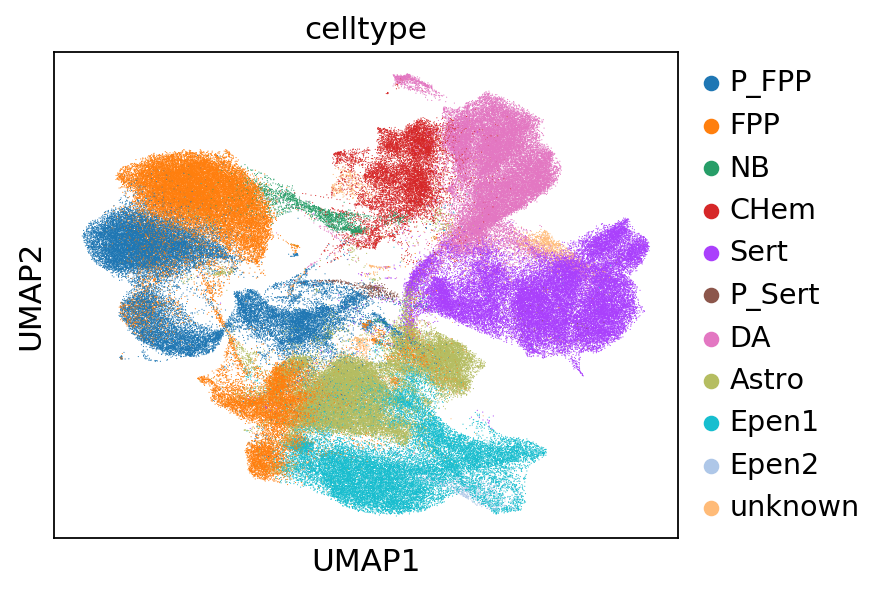

In [324]:
plotting_fcn(adata, color='celltype', size=1)

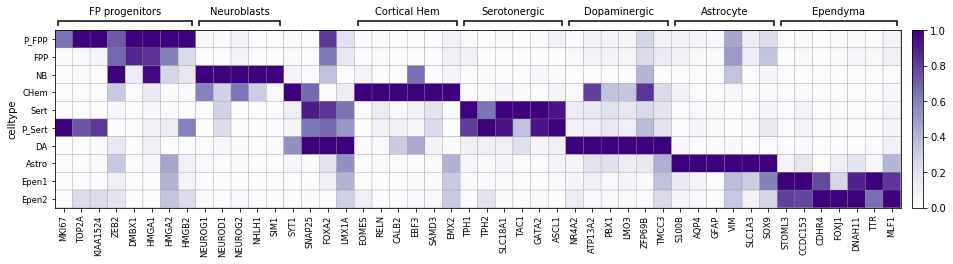

GridSpec(2, 3, height_ratios=[0.5, 10], width_ratios=[15.36, 0, 0.2])

In [21]:
var_group_positions=[(0,7), (8,12), (17, 22),(23,28), (29,34),(35,40),(41,47)]
var_group_labels=['FP progenitors','Neuroblasts', 'Cortical Hem','Serotonergic','Dopaminergic','Astrocyte','Ependyma']

excluded_celltypes = ['unknown','P_Sert',"Epen2"]
excluded_celltypes = ['unknown']

gene_list=['MKI67', 'TOP2A', 'KIAA1524', 'ZEB2', 'DMBX1', 'HMGA1', 'HMGA2', 'HMGB2',
           'NEUROG1', 'NEUROD1', 'NEUROG2', 'NHLH1', 'SIM1',
           'SYT1', 'SNAP25',
           'FOXA2', 'LMX1A',
           'EOMES', 'RELN','CALB2', 'EBF3', 'SAMD3', 'EMX2',
           'TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1',
           'NR4A2', 'ATP13A2', 'PBX1', 'LMO3', 'ZFP69B', 'TMCC3',
           'S100B', 'AQP4', 'GFAP', 'VIM', 'SLC1A3','SOX9',
           'STOML3','CCDC153','CDHR4','FOXJ1','DNAH11','TTR','MLF1']

sc.pl.matrixplot(adata[~adata.obs['celltype'].isin(excluded_celltypes)], var_names=gene_list,
                 groupby='celltype', standard_scale='var', cmap='Purples',
                 var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                 var_group_rotation=0)

<Figure size 432x288 with 0 Axes>

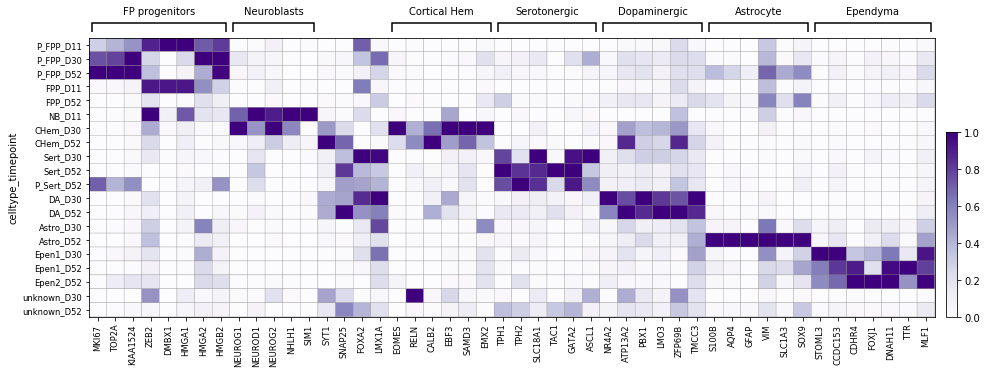

<Figure size 432x288 with 0 Axes>

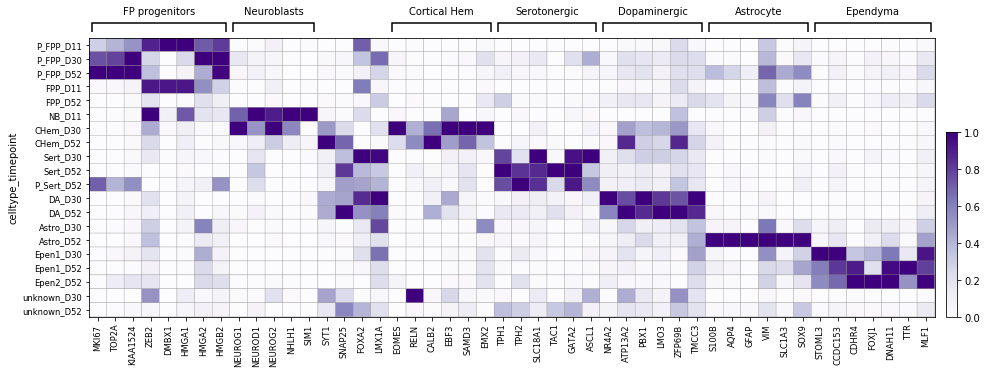

<Figure size 432x288 with 0 Axes>

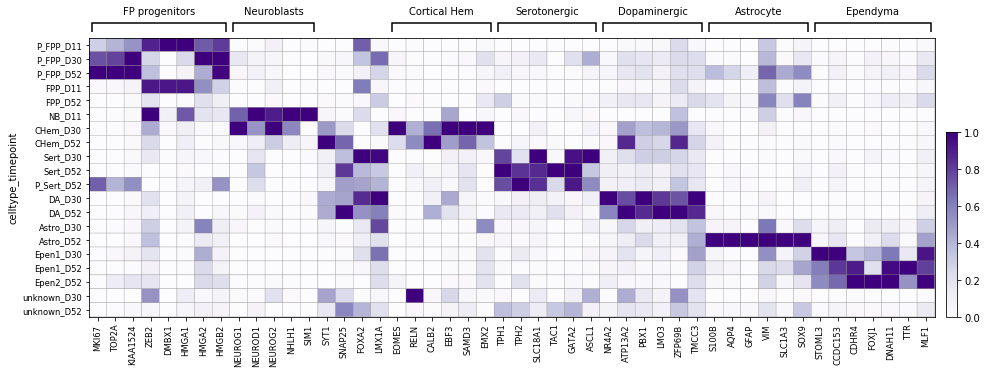

In [23]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

# select combinations with any cells
selected = list(adata.obs['celltype_timepoint'].value_counts()[adata.obs['celltype_timepoint'].value_counts()>50].index)


# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]

# filter down to those with any cells
ordering = [x for x in ordering if x in selected]

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint'] = adata.obs['celltype_timepoint'].astype(cat_type)

var_group_positions=[(0,7), (8,12), (17, 22),(23,28), (29,34),(35,40),(41,47)]
var_group_labels=['FP progenitors','Neuroblasts', 'Cortical Hem','Serotonergic','Dopaminergic','Astrocyte','Ependyma']

#excluded_celltypes = ['unknown','P_Sert',"Epen2"]
#excluded_celltypes = ['unknown']

gene_list=['MKI67', 'TOP2A', 'KIAA1524', 'ZEB2', 'DMBX1', 'HMGA1', 'HMGA2', 'HMGB2',
           'NEUROG1', 'NEUROD1', 'NEUROG2', 'NHLH1', 'SIM1',
           'SYT1', 'SNAP25',
           'FOXA2', 'LMX1A',
           'EOMES', 'RELN','CALB2', 'EBF3', 'SAMD3', 'EMX2',
           'TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1',
           'NR4A2', 'ATP13A2', 'PBX1', 'LMO3', 'ZFP69B', 'TMCC3',
           'S100B', 'AQP4', 'GFAP', 'VIM', 'SLC1A3','SOX9',
           'STOML3','CCDC153','CDHR4','FOXJ1','DNAH11','TTR','MLF1']

for time_point in ['D11','D30','D52']:
    figure()
    sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint', standard_scale='var', cmap='Purples',
                     var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

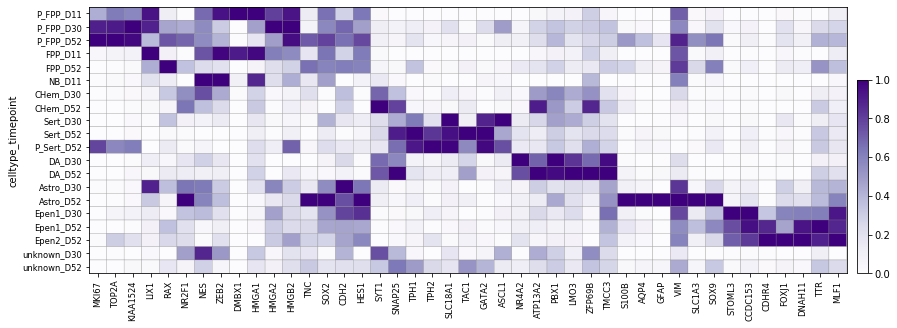

<Figure size 432x288 with 0 Axes>

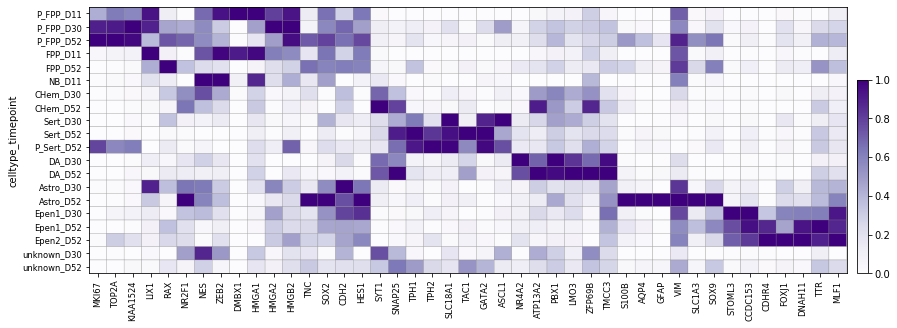

<Figure size 432x288 with 0 Axes>

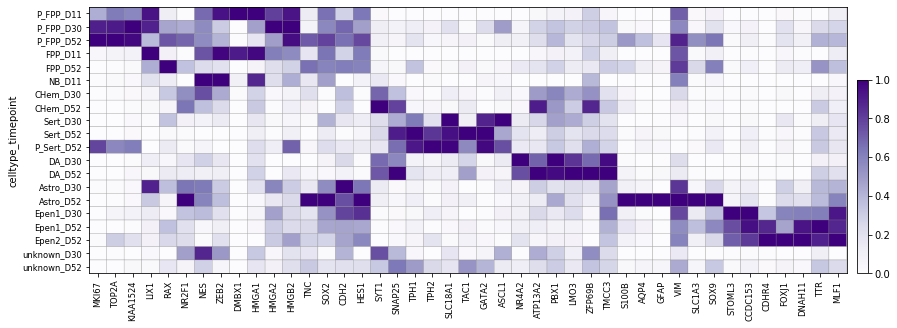

In [116]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

adata.obs['celltype_timepoint']['Astro_D30'] = 'GP_D30'

# select combinations with any cells
selected = list(adata.obs['celltype_timepoint'].value_counts()[adata.obs['celltype_timepoint'].value_counts()>50].index)


# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","GP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]

# filter down to those with any cells
ordering = [x for x in ordering if x in selected]

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint'] = adata.obs['celltype_timepoint'].astype(cat_type)

# var_group_positions=[(0,7), (8,12), (17, 22),(23,28), (29,34),(35,40),(41,47)]
# var_group_labels=['FP progenitors','Neuroblasts', 'Cortical Hem','Serotonergic','Dopaminergic','Astrocyte','Ependyma']

#excluded_celltypes = ['unknown','P_Sert',"Epen2"]
#excluded_celltypes = ['unknown']

gene_list=['MKI67','TOP2A', 'KIAA1524','LIX1','RAX', 'NR2F1','NES', 'ZEB2','DMBX1','HMGA1','HMGA2','HMGB2',
           'TNC','SOX2','CDH2','HES1', 'SYT1', 'SNAP25','TPH1', 'TPH2', 'SLC18A1', 'TAC1', 'GATA2','ASCL1',
           'NR4A2', 'ATP13A2', 'PBX1', 'LMO3', 'ZFP69B', 'TMCC3','S100B', 'AQP4', 'GFAP', 'VIM', 'SLC1A3','SOX9',
           'STOML3','CCDC153','CDHR4','FOXJ1','DNAH11','TTR','MLF1']

for time_point in ['D11','D30','D52']:
    figure()
    sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint', standard_scale='var', cmap='Purples',
#                      var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

<Figure size 432x288 with 0 Axes>

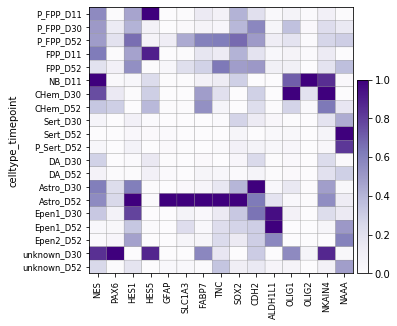

<Figure size 432x288 with 0 Axes>

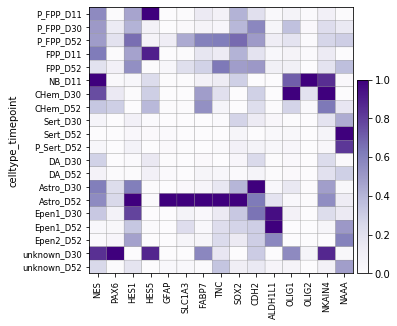

<Figure size 432x288 with 0 Axes>

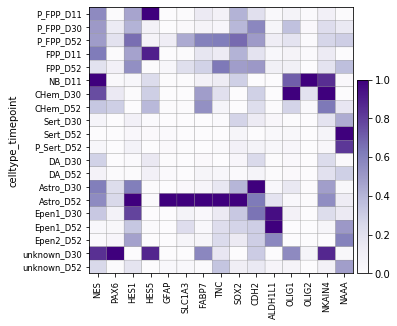

In [25]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

# select combinations with any cells
selected = list(adata.obs['celltype_timepoint'].value_counts()[adata.obs['celltype_timepoint'].value_counts()>50].index)


# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]

# filter down to those with any cells
ordering = [x for x in ordering if x in selected]

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint'] = adata.obs['celltype_timepoint'].astype(cat_type)

# var_group_positions=[(0,7), (8,12), (17, 22),(23,28), (29,34),(35,40),(41,47)]
# var_group_labels=['FP progenitors','Neuroblasts', 'Cortical Hem','Serotonergic','Dopaminergic','Astrocyte','Ependyma']

#excluded_celltypes = ['unknown','P_Sert',"Epen2"]
#excluded_celltypes = ['unknown']

gene_list=['NES','PAX6','HES1','HES5','GFAP','SLC1A3','FABP7','TNC','SOX2','CDH2','ALDH1L1',
       'OLIG1','OLIG2','NKAIN4','NAAA']

for time_point in ['D11','D30','D52']:
    figure()
    sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint', standard_scale='var', cmap='Purples',
                    # var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

<Figure size 432x288 with 0 Axes>

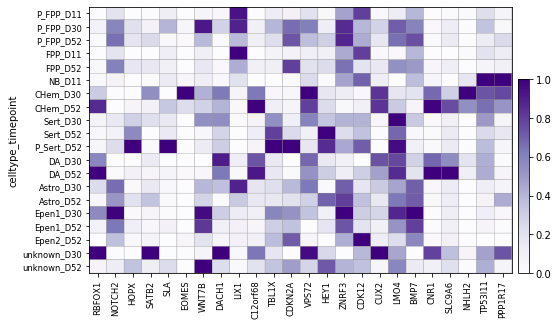

<Figure size 432x288 with 0 Axes>

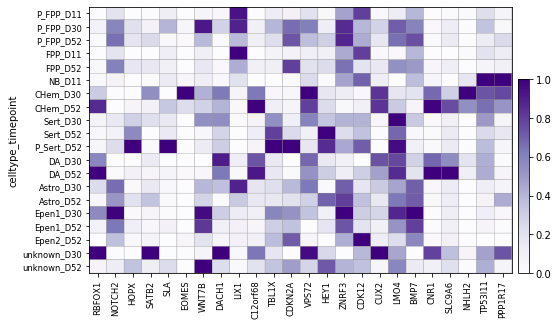

<Figure size 432x288 with 0 Axes>

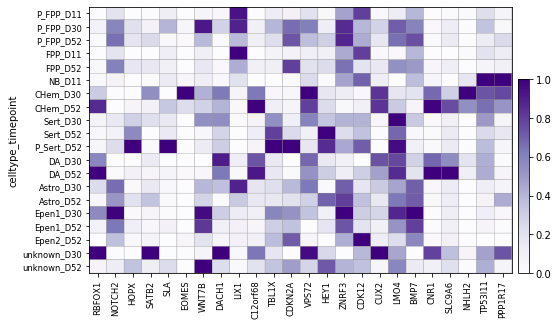

In [90]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

# select combinations with any cells
selected = list(adata.obs['celltype_timepoint'].value_counts()[adata.obs['celltype_timepoint'].value_counts()>50].index)


# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]

# filter down to those with any cells
ordering = [x for x in ordering if x in selected]

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint'] = adata.obs['celltype_timepoint'].astype(cat_type)

# var_group_positions=[(0,7), (8,12), (17, 22),(23,28), (29,34),(35,40),(41,47)]
# var_group_labels=['FP progenitors','Neuroblasts', 'Cortical Hem','Serotonergic','Dopaminergic','Astrocyte','Ependyma']

#excluded_celltypes = ['unknown','P_Sert',"Epen2"]
#excluded_celltypes = ['unknown']
gene_list=['RBFOX1','NOTCH2','HOPX','SATB2','SLA', 'EOMES','WNT7B','DACH1','LIX1',
#            'CCDC184',
           'C12orf68',
           'TBL1X', 'CDKN2A','VPS72',
#            'CCDN1',
#            'TCFL1', 
          'HEY1','ZNRF3','CDK12','CUX2','LMO4','BMP7','CNR1','SLC9A6',
#            'LGAGS1',
           'NHLH2','TP53I11','PPP1R17']

for time_point in ['D11','D30','D52']:
    figure()
    sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint', standard_scale='var', cmap='Purples',
                    # var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

<Figure size 432x288 with 0 Axes>

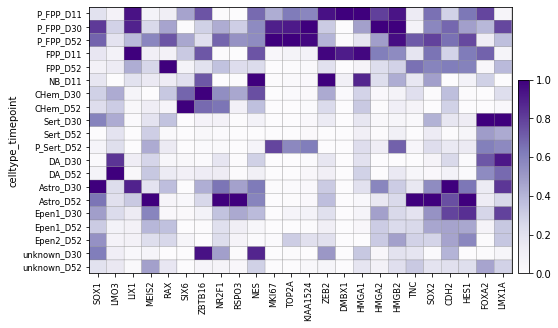

<Figure size 432x288 with 0 Axes>

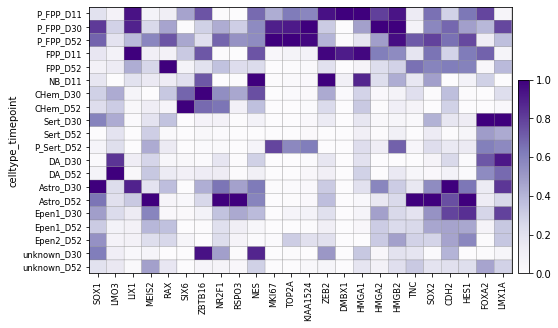

<Figure size 432x288 with 0 Axes>

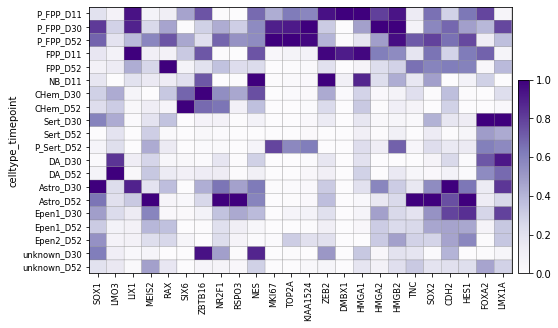

In [102]:
adata.obs['celltype_timepoint'] = (adata.obs.apply(lambda x: x['celltype']+'_'+x['time_point'], axis=1))

# select combinations with any cells
selected = list(adata.obs['celltype_timepoint'].value_counts()[adata.obs['celltype_timepoint'].value_counts()>50].index)


# try to store celltype as categorical with different ordering
ordering = ["P_FPP","FPP","NB","CHem","Sert","P_Sert","DA", "Astro","Epen1","Epen2","unknown"]
ordering = [x+'_'+y for x in ordering for y in ['D11','D30','D52']]

# filter down to those with any cells
ordering = [x for x in ordering if x in selected]

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_timepoint'] = adata.obs['celltype_timepoint'].astype(cat_type)

# var_group_positions=[(0,7), (8,12), (17, 22),(23,28), (29,34),(35,40),(41,47)]
# var_group_labels=['FP progenitors','Neuroblasts', 'Cortical Hem','Serotonergic','Dopaminergic','Astrocyte','Ependyma']

#excluded_celltypes = ['unknown','P_Sert',"Epen2"]
#excluded_celltypes = ['unknown']
gene_list=['SOX1','LMO3', 'LIX1','MEIS2', 'RAX', 'SIX6', 
#            'NCAD', 
           'ZBTB16', 'NR2F1', 'RSPO3', 'NES', 'MKI67', 'TOP2A', 
           'KIAA1524', 'ZEB2', 'DMBX1', 'HMGA1', 'HMGA2', 'HMGB2', 'TNC', 'SOX2','CDH2', 'HES1','FOXA2', 'LMX1A']

for time_point in ['D11','D30','D52']:
    figure()
    sc.pl.matrixplot(adata, var_names=gene_list,
                     groupby='celltype_timepoint', standard_scale='var', cmap='Purples',
                    # var_group_positions=var_group_positions, var_group_labels = var_group_labels,
                     var_group_rotation=0)

In [ ]:
import pandas as pd
eqtl = pd.read_csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
eqtl.head()

eqtl[eqtl['feature_id'] == 'ENSG00000168116']

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--h5_input',
                    help="Input h5 file", type=str)
parser.add_argument('--pca_input',
                    help="Input dimensionality reduction file", type=str)
parser.add_argument('--h5_output',
                    help="Output results file", type=str)
parser.add_argument('--cluster_output',
                    help="Output cluster tsv file", type=str)
parser.add_argument('--resolution',
                    help="Louvain clustering resolution - higher values create smaller clusters.",
                    default=0.15, type=float)
args = parser.parse_args()

in_file = args.h5_input
pca_file = args.pca_input
dataset_outfile = args.h5_output
cluster_outfile = args.cluster_output
resolution = args.resolution

import argparse
import pandas as pd
import scanpy.api as sc


parser = argparse.ArgumentParser()
parser.add_argument('--h5_input',
                    help="Input h5 file", type=str)
parser.add_argument('--pca_input',
                    help="Input dimensionality reduction file", type=str)
parser.add_argument('--h5_output',
                    help="Output results file", type=str)
parser.add_argument('--cluster_output',
                    help="Output cluster tsv file", type=str)
parser.add_argument('--resolution',
                    help="Louvain clustering resolution - higher values create smaller clusters.",
                    default=0.15, type=float)
args = parser.parse_args()

in_file = args.h5_input
pca_file = args.pca_input
dataset_outfile = args.h5_output
cluster_outfile = args.cluster_output
resolution = args.resolution

pca_df = pd.read_csv(pca_file, sep='\t', index_col=0)

adata = sc.read(in_file)

# replace PCA with the specified PCA
adata.obsm['X_pca'] = pca_df.values

print('clustering...')

sc.pp.neighbors(adata, n_neighbors=10)

sc.tl.louvain(adata, flavor='vtraag',resolution=resolution)

print('{} clusters identified'.format(adata.obs['louvain'].drop_duplicates().shape[0]))

print('computing UMAP...')
sc.tl.umap(adata, random_state=2)

adata.write(dataset_outfile)

cell_clustering_df = adata.obs[['louvain']]
cell_clustering_df.to_csv(cluster_outfile, sep='\t')

dplyr        (0.8.3       -> 0.8.4      ) [CRAN]
tidyr        (0.8.3       -> 1.0.2      ) [CRAN]
rlang        (0.4.0       -> 0.4.4      ) [CRAN]
RcppArmad... (0.9.800.3.0 -> 0.9.850.1.0) [CRAN]
RcppProgress (0.4.1       -> 0.4.2      ) [CRAN]
pkgconfig    (2.0.2       -> 2.0.3      ) [CRAN]
R6           (2.4.0       -> 2.4.1      ) [CRAN]
tidyselect   (0.2.5       -> 1.0.0      ) [CRAN]
BH           (1.69.0-1    -> 1.72.0-3   ) [CRAN]
scales       (1.0.0       -> 1.1.0      ) [CRAN]
stringi      (1.4.3       -> 1.4.5      ) [CRAN]
vctrs        (0.2.0       -> 0.2.2      ) [CRAN]
digest       (0.6.20      -> 0.6.23     ) [CRAN]
cli          (1.1.0       -> 2.0.1      ) [CRAN]
fansi        (0.4.0       -> 0.4.1      ) [CRAN]
pillar       (1.4.2       -> 1.4.3      ) [CRAN]
plyr         (1.8.4       -> 1.8.5      ) [CRAN]
farver       (NA          -> 2.0.3      ) [CRAN]


Installing 18 packages: dplyr, tidyr, rlang, RcppArmadillo, RcppProgress, pkgconfig, R6, tidyselect, BH, scales, stringi, vctrs, digest, cli, fansi, pillar, plyr, farver
